<a href="https://colab.research.google.com/github/ShahidHasib586/MIR-Deep-learning/blob/main/%5Bw_questions%5Ddl4sequences_lab_2025_Shahid_Ahamed_Hasib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning for sequential data - Lab

**Get the remaining points by February 10th at the latest.**


Reach out to me at santiago.cuervo@lis-lab.fr for any question or issue you might encounter.

# Problem 2. GPT

Now we will implement the GPT architecture. GPT stands for _Generative Pre-trained Transformer_. GPT is a model trained to generate sequences, one token (character, word, or else) at a time, pretty similar to the RNN from slide 25 in our lecture. GPT is the architecture behind the immensely famous [ChatGPT](https://chat.openai.com/) and many other state-of-the-art AIs.

GPT training examples look like this (image taken from [GPT-3 Illustrated](https://jalammar.github.io/how-gpt3-works-visualizations-animations/)):

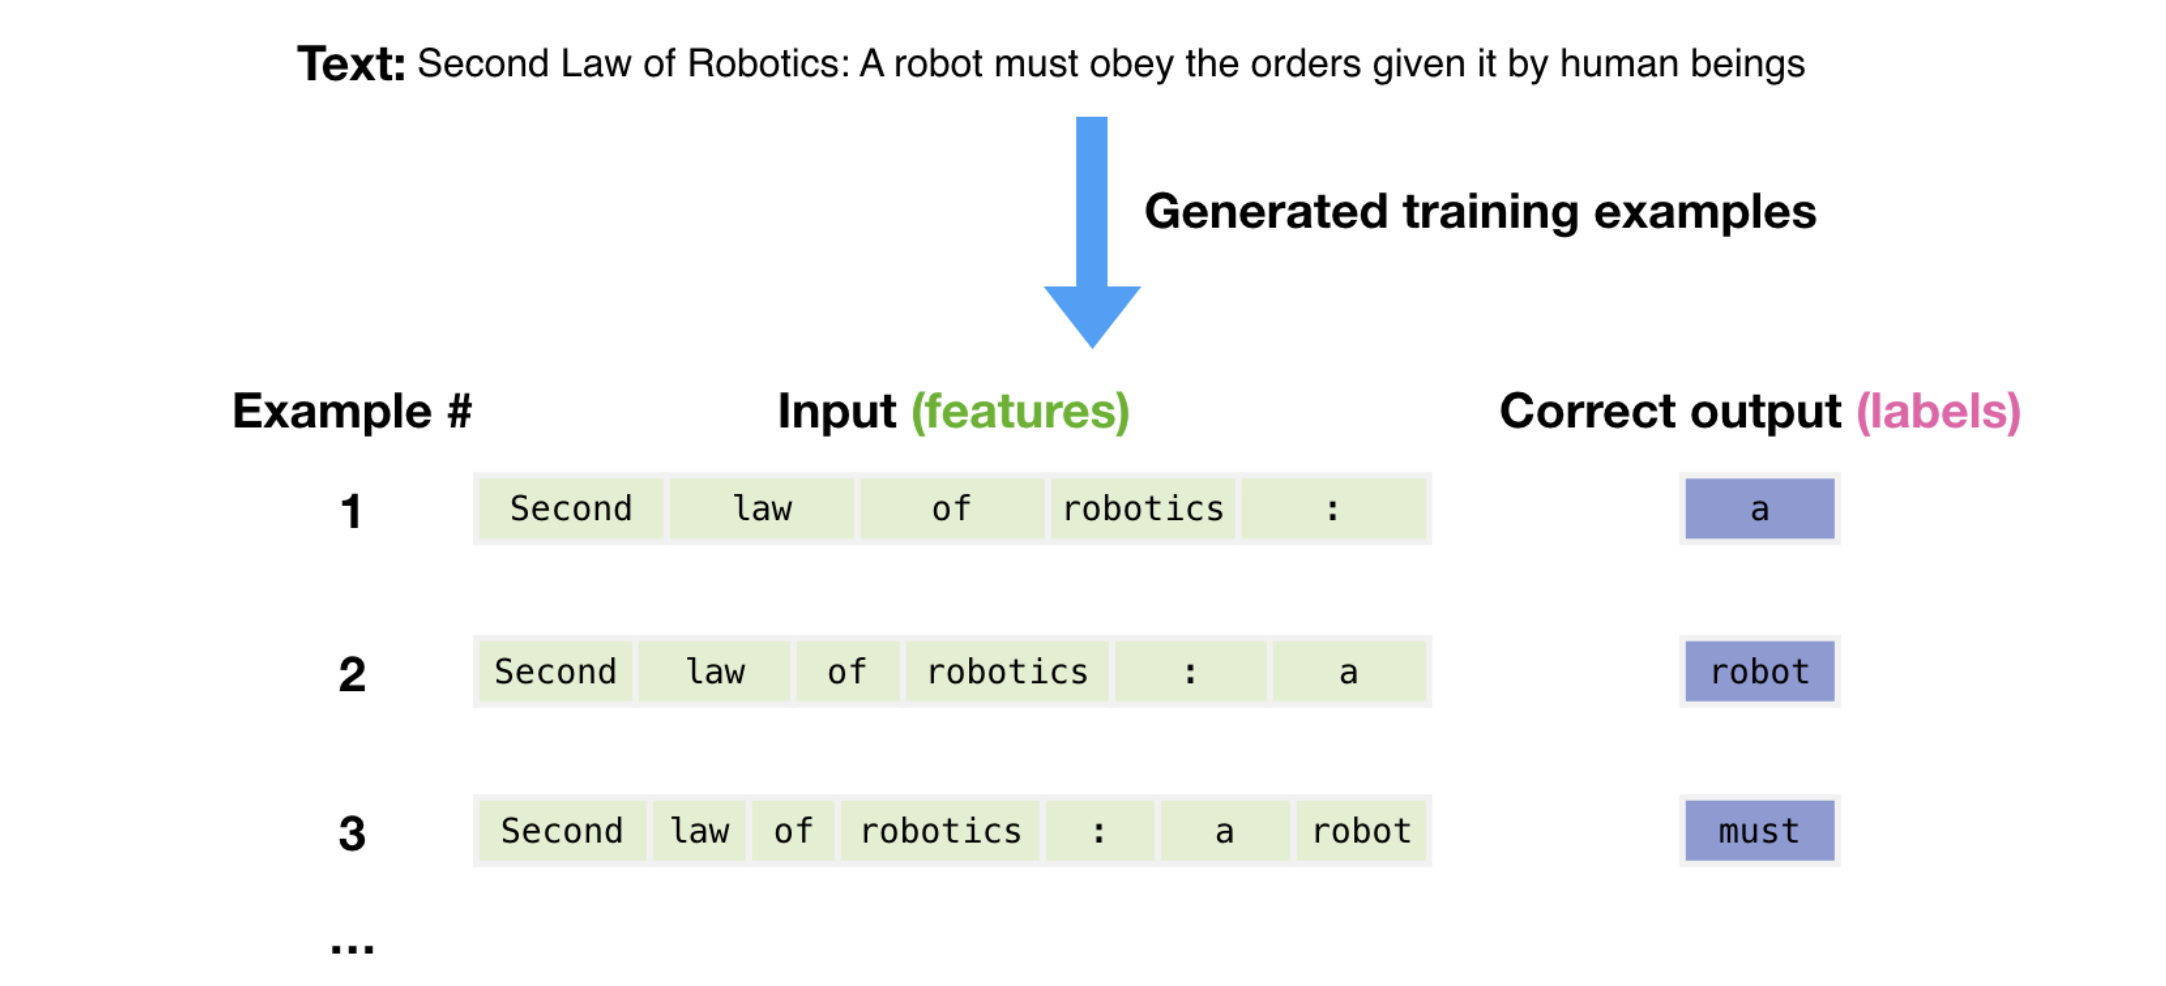![image.png](attachment:image.png)

So, in the example above, the input sequence would be `Second law of robotics: A robot must obey the orders given it by human`, and the target sequence would be `law of robotics: A robot must obey the orders given it by human beings`. In short words, GPT is a transformer trained to do next-token prediction. This is termed _auto-regressive modeling_.

Aside of the main transformer elements we saw in the lecture there is one extra things we need to take care of to implement GPT. First, a definition:

**Embedding**: a real valued vector of dimension $d$ (usually high-dimensional) representing something. E.g. neural nets can process numbers, but not words, so in order to get them to process text we assign an embedding to each word.

Now, thhe extra elements we need to implement:

**Positional encoding**:
    
Notice how none of the operations in the transformer cares about the position of the elements in the sequence. The only operation by which elements of the sequence interact with each other is self-attention, but self-attention is just a weighted average of the sequence elements. In a weighted average if you change the order of the elements the result is still the same.

Sequences however have an order. For instance, if we switch `robot` and `human` in the example above, yielding as input `Second law of robotics: A human must obey the orders given it by robot beings`, the meaning of the sentence has totally changed, but the output of the transformer would be the same as with the original!

To fix this we need to somehow inject information about the position. The way we do it is by adding to each embedding representing an input word another embedding to represent the position of such word. Consider $E$ a function that assigns embeddings to words, and $P$ a function that assigns embeddings to positions. Then, in our example, the input to the transformer would be:

$$
E(Second) + P(0), E(law) + P(1), E(of) + P(2), \dots, E(human) + P(14)
$$

The simplest way to implement positional encoding is using learned embeddings: we assume that we will process sequences of at most $T$ elements, and initialize randomly $T$ positional embeddings. During training, the model learns to modify our randomly initialize embeddings to better represent position. There are however many [methods for positional encodings](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/). This is actually a fairly active research area. Currently, the most popular (advanced) positional encoding method is [RoPE](https://blog.eleuther.ai/rotary-embeddings/).


So, in summary, in GPT:

1. We convert each input token in the sequence to an embedding and add to it a positional embedding.
2. We pass the encoded inputs through $N$ transformer blocks, which are just as the ones we described in class, except that we use causal self-attention instead of vanilla self-attention.
3. We use the output of the last transformer block as the input to a Softmax classifier that predicts the next-token in the sequence.

In the tasks below you will implement and use the GPT architecture.


**Tasks**:
1. **(3.5 pt)** Implement a transformer decoder block:
    
    1.1 **(2 pt)** ~~Implement the forward pass of `MultiheadAttention`. You should implement the projection of the input embeddings to queries, keys and values (using `c_attn`), the computation of the causal attention matrix, and the output projection (using `c_proj`).~~
    
    _Note_: ~~notice that we intend to do the query, key, and value projections in a single batched operation, therefore the `3 * n_embd` as output in `c_attn`. This is a more efficient implementation than doing separate linear projections for query, key, and value. However, you can use separate projection matrices if it is easier for you.~~
    
    _Note_: ~~for the causal attention matrix you can use [masked_fill](https://pytorch.org/docs/stable/generated/torch.Tensor.masked_fill_.html#torch.Tensor.masked_fill_) in order to apply the mask.~~
    
    1.2. **(0.5 pt)** Implement the forward pass of the attention block in `Block`. Use the following transformer block as guide of the operations you should implement:
    
    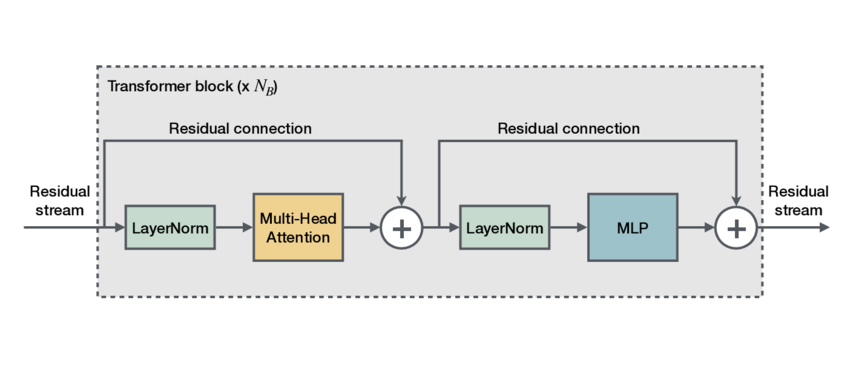
    
    Where `LayerNorm` corresponds to layer normalization, i.e. `ln_1` and `ln_2` in our implementation.

    __What I expect for this task__:
    * An explanation, ideally graphical, of how each piece of code implements each element block in the diagram. Explanation of the dimensions of the tensors, inputs and outputs, and the processing pipeline (i.e. how tensors are changing throughout each block).
    
    1.3. **(1 pt)** Implement the forward pass of the transformer in `GPT`. In here you should implement the operations that apply the token embedding `wte` and position embedding `wpe` to the inputs, as well as the stack of transformer blocks `h`.

    __What I expect for this task__:
    * Simply explain how embedding tables work. Why do they work? Can they be expressed as a matrix operation?

2. **(7.0 pt max)** Train a GPT to learn to generate Harry Potter text based on the first four books:

    2.1 **(0.5 pt)** As we mentioned, neural nets need to assign vectors to words/characters in order to process them. Normally for that we use the [nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module, as in the `__init__` method from `GPT`. It assigns vectors to integer numbers, which themselves can correspond to discrete symbols, like our characters or words. For this exercise you have to encode our text as integer numbers (we call this process tokenization). We will start with the simplest tokenization: encode each character as an integer. You will need to create two dictionaries: `stoi` (string to integer) and `itos` (integer to string) that map text to integers and integers to text, respectively.
    
    2.2 **(0.5 pt)** Define the targets `y` in the `get_batch` function so that the model does next token prediction.
    
    2.3 **(4.5 pt max)** Implement the code to generate data in the function `generate` of `GPT`. Here you just need to feed back the predicted next tokens that the model outputs as input for the next time step (**0.5 pt**). You can also implement [top-k sampling](https://huggingface.co/blog/how-to-generate) for an extra **1 pt**, and/or [Key-Value caching](https://huggingface.co/blog/optimize-llm) to accelerate inference for extra **3 pt**.

    __What I expect for this task__:
    * If you simply implement the vanilla generate, nothing extra.
    * If you implement top-k, your intuitions on why would we want to do top-k sampling, and ideally a few samples that would allow us to see the difference (if any) between generating with or without top-k, for different values of k.
    * If you implement the KV-Cache, explain why is this useful? why does it work? Show its effect on generation time for several sequence lengths.
    
    2.4 **(1.5 pt)** Improve the tokenization.
    
    Using character tokenization is a simple first approach, but is rarely used in practice because it results in too long sequences (remember that the computational complexity of transformers grows quadratically with the sequence length). As an alternative we could split the text by whitespaces (e.g. the sentence _"said Dumbledore, smiling"_ becomes `["said", "Dumbledore,", "smiling"]`), and then encode each unique word in the text as an integer. This is termed word tokenization, and although it solves our issue with length, it comes with its own problems. For instance, how do we deal with a word that was not in the training set? We could assign an special token for unknown words, but there is a better alternative: subword tokenization.
    
    Subword tokenization divides words into smaller, meaningful units, from which other words can be formed. Consider the word "_chatGPT_", and imagine you are using a word-level tokenizer that doesn't recognize the term because it's not present in its vocabulary. In such a case, the entire term will be treated as an out-of-vocabulary (OOV) word, and the model may struggle to understand or generate meaningful predictions for it. A subword tokenizer, instead of treating the entire term as a single token, it would would break it down into smaller, more meaningful subword units. For instance, it might tokenize "_chatGPT_" into `chat` and `GPT`. This would enable the model to leverage its already acquired knowledge of `chat` and `GPT` to infer that likely "_chatGPT_" is a `GPT` with which you can `chat`.
    
    Implement subword tokenization. You can use [SentencePiece](https://github.com/google/sentencepiece) or any other subword tokenizer of your chosing. Repeat training. Do you see any improvement?.

    __What I expect for this task__:
    * Compare it somehow to using character tokenization. Which one is better? Why?

3. **(2.5 pt máx)** Evaluate the English skills of your Harry Potter GPT.
    
    If you have successfully trained your GPT, you should have now a neural network that generates (vaguely) Harry Potter related text. How good of an English it learned from it? In this task we will assess it by calculating how well our model can tell apart proper and wrong English. We will test it in two problems:
    
    * Spelling test: we will present our model with pairs of `[word, non-word]`, e.g. `[observation, odservation]`. We will check on average how often our model assigns higher probablity to the properlly spelled word.
    * Grammar test: we will present our model with pairs of `[sentence, non-sentence]`, e.g. `[Hermione is listening to herself, Hermione is listening to itself]`. We will check on average how often our model assigns higher probablity to the properlly spelled sentence.
    
    In this exercise your task is to implement the function that will calculate the score of the model (**2 pt**). Remember from the lecture that we define the probability of a sentence of length $T$ composed of tokens $x_1, x_2, \dots, x_T$ as:
    
$$
p(x_1, x_2, \dots, x_T) = p(x_1)p(x_2 | x_1)p(x_3 | x_1, x_2) \dots p(x_T | x_1, x_2, \dots, x_{T-1})
$$
    
   , and that our model's inputs and outputs look like this:
   
   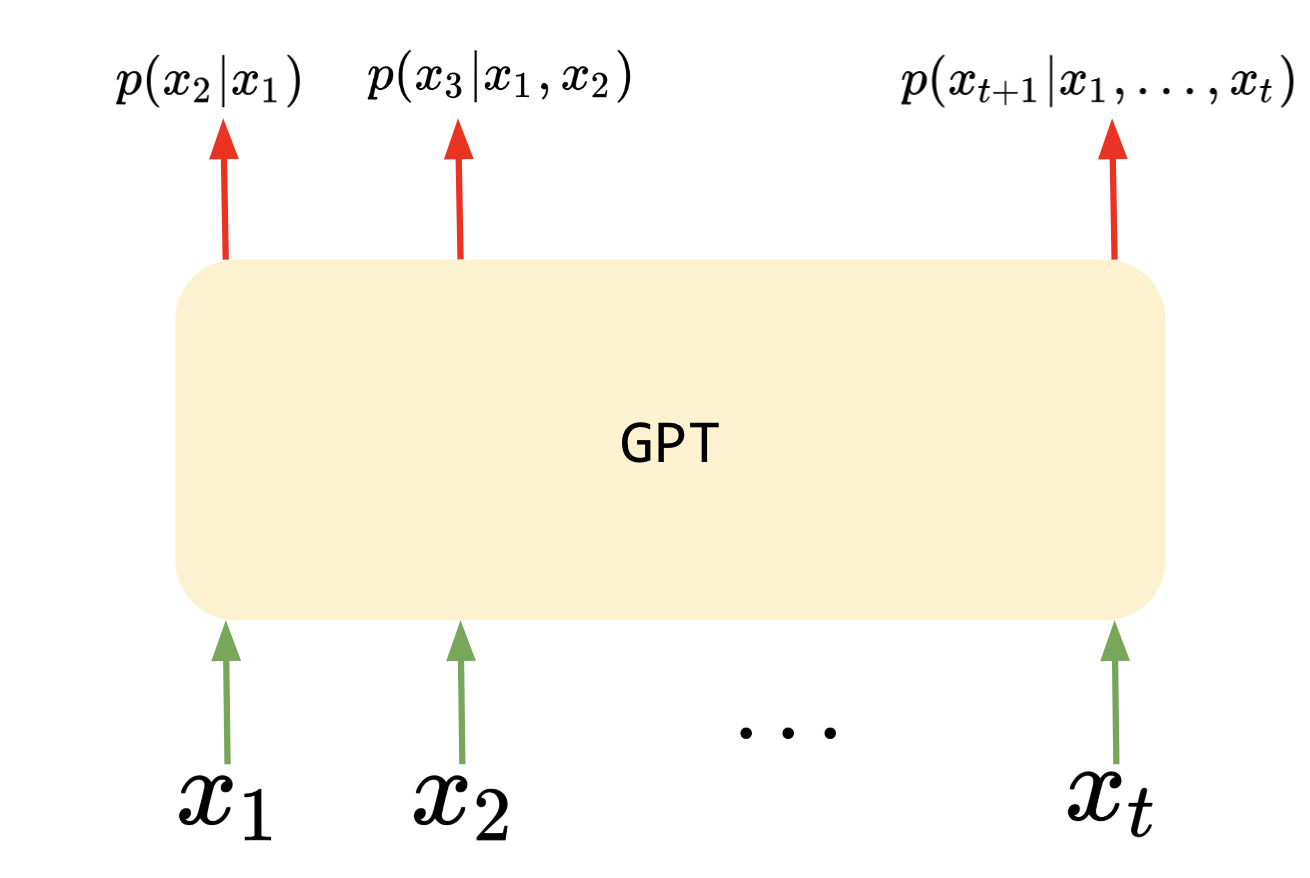
    
_Hint: think of the equation for the cross entropy loss with which our model is trained, it should give you an easy answer_.

For extra **0.5 pt**, and if you did task 2.4, check if a model trained on subwords does better on the grammar test.

__What I expect for this task__:

* Just the right answer and a good implementation. If you use the cross-entropy hint, explain your reasoning process for it.

First, let's download the data we will need:

In [ ]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport

![ -e hp1.txt ] || gdown 'https://drive.google.com/uc?id=1_3wY2jvzTZ6A933qez9CdcqTlr4uBrRC' -O hp1.txt
![ -e hp2.txt ] || gdown 'https://drive.google.com/uc?id=14fVcy8Ps72SyKV8hiROe0UQnIkdj38ji' -O hp2.txt
![ -e hp3.txt ] || gdown 'https://drive.google.com/uc?id=1nT8LDwx36T8HV9jCkwpofHruEfDaZ_c0' -O hp3.txt
![ -e hp4.txt ] || gdown 'https://drive.google.com/uc?id=19mhtuPs2OWer_ogDfyXpd3EXODwabt3c' -O hp4.txt
![ -e blimp.txt ] || gdown 'https://drive.google.com/uc?id=1D4MmosO1YH3osGjk25i7G-W6iyRf06_J' -O blimp.txt
![ -e wuggy.txt ] || gdown 'https://drive.google.com/uc?id=16N5kmaylACXIH4NkZjMvaDyvDv6Sa7xz' -O wuggy.txt

Downloading...
From: https://drive.google.com/uc?id=1_3wY2jvzTZ6A933qez9CdcqTlr4uBrRC
To: /content/hp1.txt
100% 440k/440k [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=14fVcy8Ps72SyKV8hiROe0UQnIkdj38ji
To: /content/hp2.txt
100% 492k/492k [00:00<00:00, 155MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nT8LDwx36T8HV9jCkwpofHruEfDaZ_c0
To: /content/hp3.txt
100% 612k/612k [00:00<00:00, 145MB/s]
Downloading...
From: https://drive.google.com/uc?id=19mhtuPs2OWer_ogDfyXpd3EXODwabt3c
To: /content/hp4.txt
100% 1.11M/1.11M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D4MmosO1YH3osGjk25i7G-W6iyRf06_J
To: /content/blimp.txt
100% 28.9k/28.9k [00:00<00:00, 78.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=16N5kmaylACXIH4NkZjMvaDyvDv6Sa7xz
To: /content/wuggy.txt
100% 736k/736k [00:00<00:00, 143MB/s]


# **Explanation**

The Transformer decoder block consists of two main sub-blocks:

1. Multi-Head Attention with Layer Normalization & Residual Connection
Feed-Forward Network (MLP) with Layer
2. Normalization & Residual

# **Understanding the Transformer Block Diagram**



*   Pipeline Breakdown

1. Input enters the residual stream.
2. LayerNorm is applied before computing attention.
3. Multi-Head Attention is computed over the input.
4. Residual connection is added (original input + attention output).
5. LayerNorm is applied before the MLP (Feed-Forward Network).
6. MLP is applied to enhance feature representations.
7. Residual connection is again added (attention output + MLP output).
8. Output continues into the next transformer block.

Flow of how tokens move through the Transformer Decoder Block:
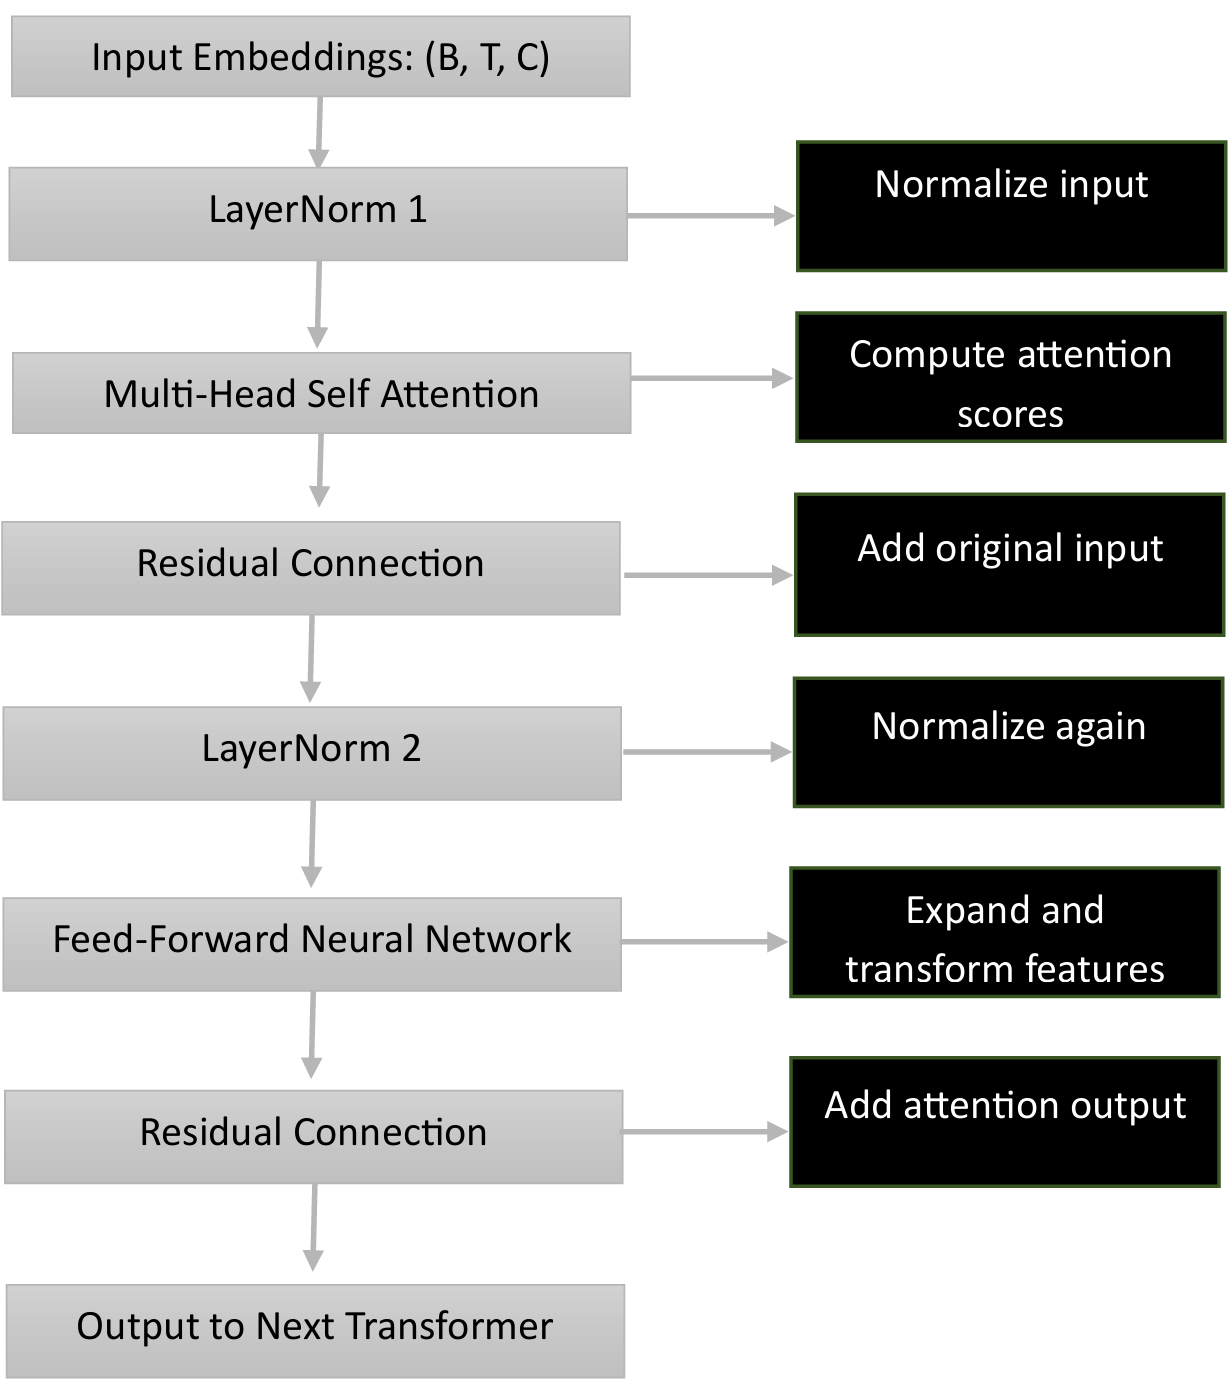

** Multi-Head Attention: **

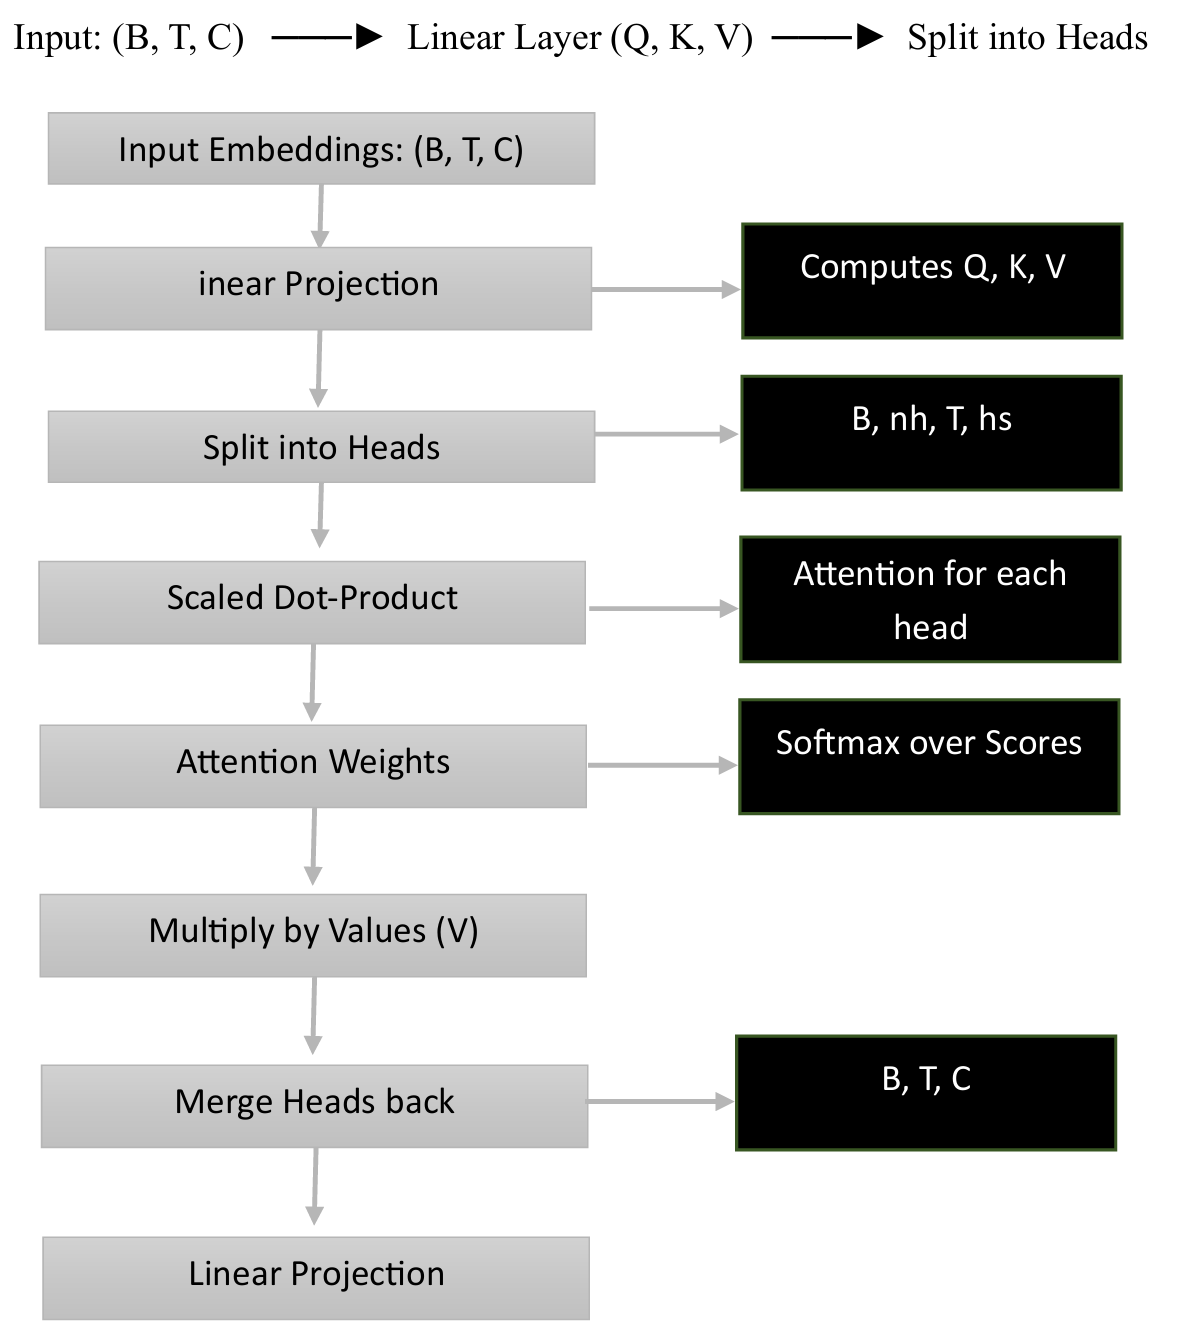

** Residual Connection **

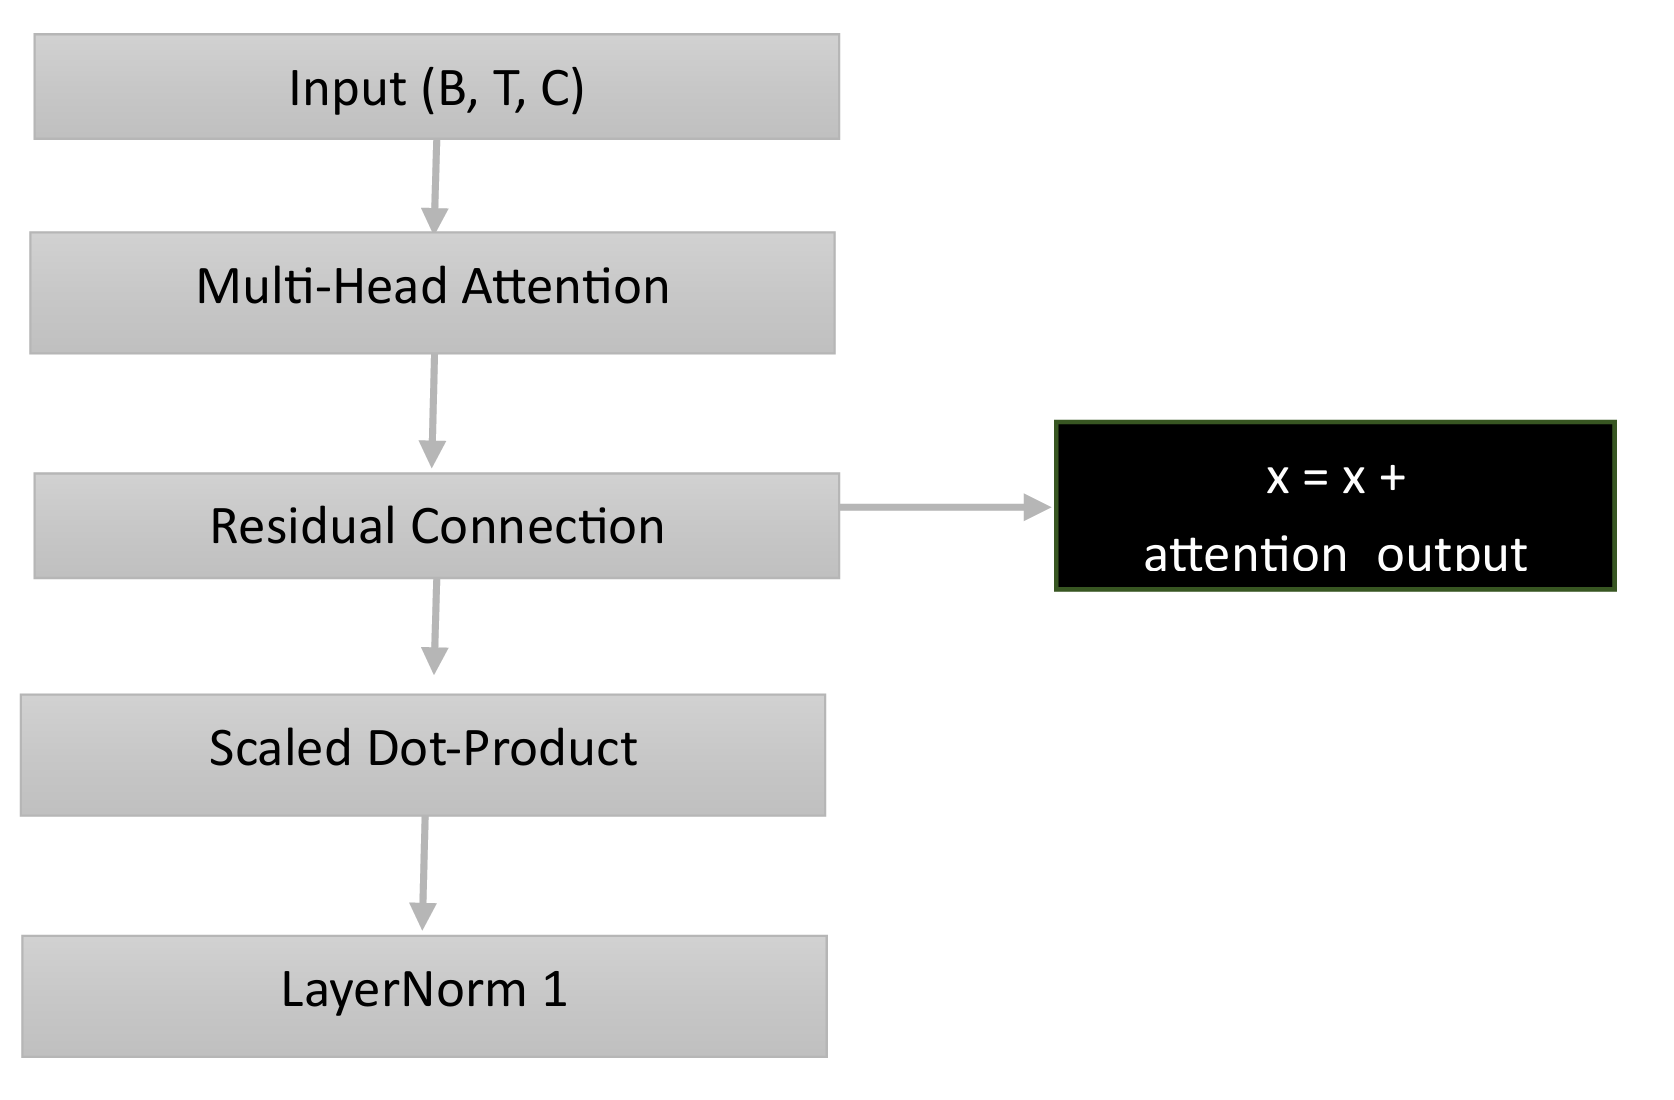


Multi-Head Attention splits the input into multiple heads and computes attention in parallel.
Residual connections allow the model to preserve the original input, which helps with gradient flow.
After attention, we pass the output through a Feed-Forward Neural Network that enhances features.

**MLP**
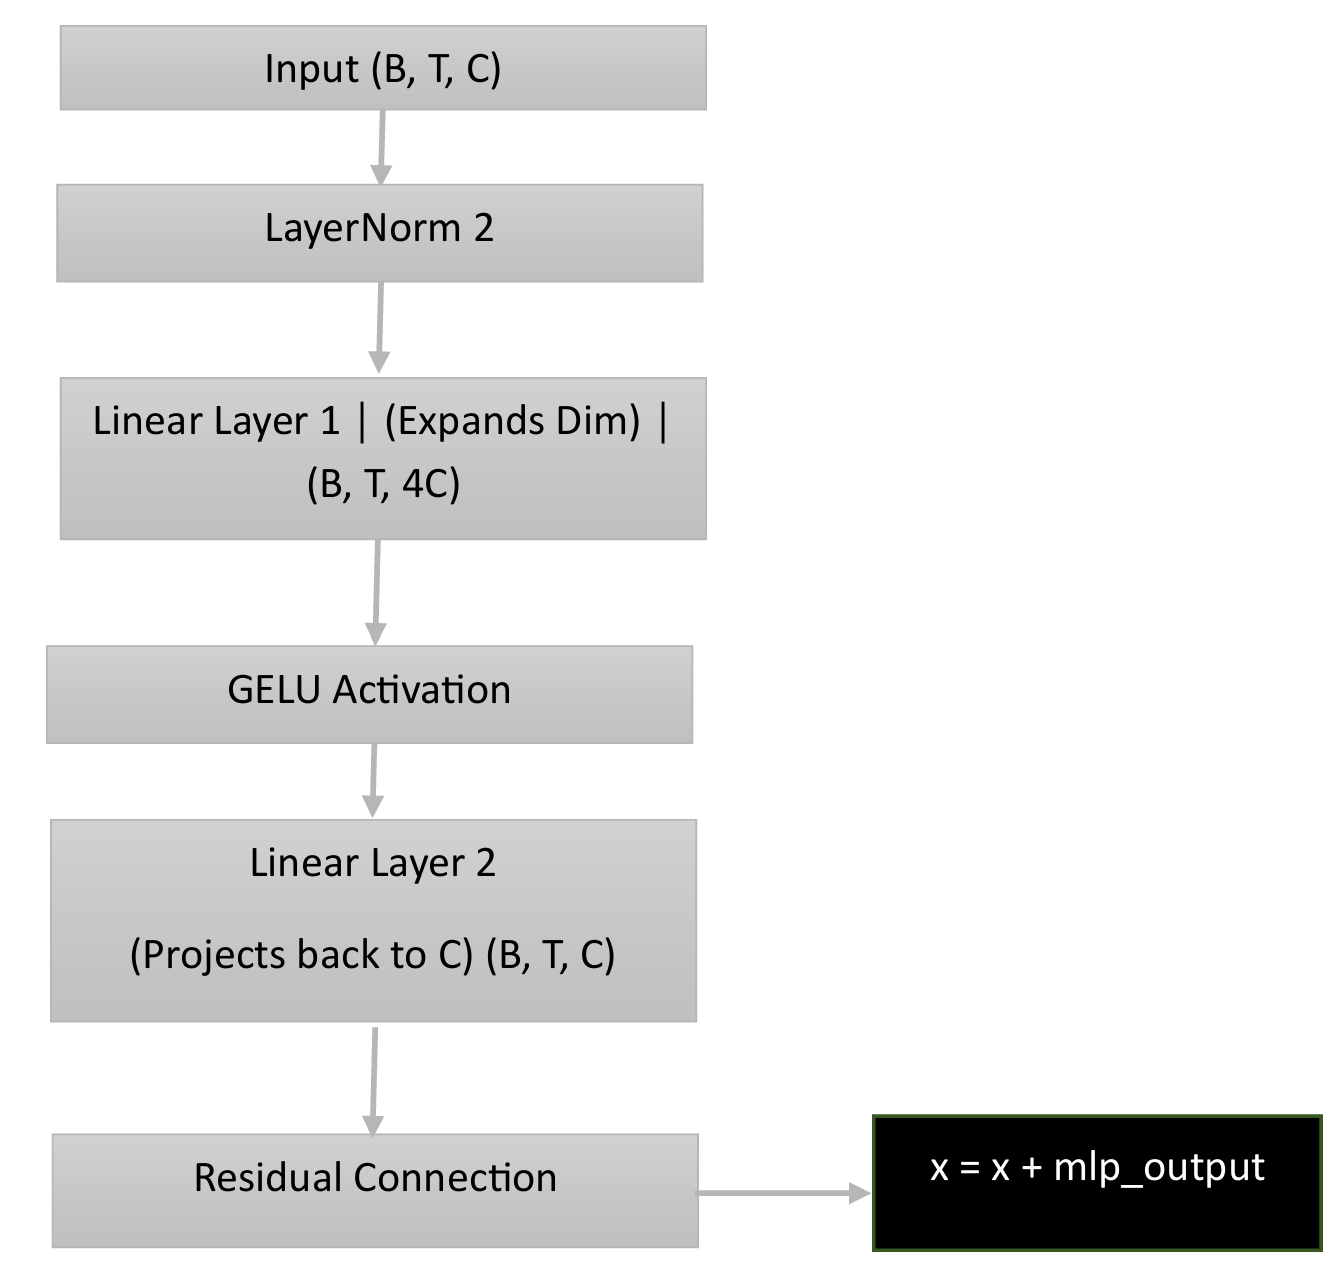


In [ ]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from matplotlib.patches import Rectangle
from tqdm.notebook import tqdm

In [ ]:
class MultiheadAttention(nn.Module):

    def __init__(self, n_embd, n_head, block_size, dropout):
        super().__init__()
        assert n_embd % n_head == 0, "The embedding dimension must be divisible by the number of heads"
        self.n_head = n_head
        self.n_embd = n_embd
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(n_embd, 3 * n_embd, bias=False)
        # output projection
        self.c_proj = nn.Linear(n_embd, n_embd, bias=False)
        # regularization
        self.attn_dropout = nn.Dropout(dropout)
        self.resid_dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.size()  # batch size, sequence length, embedding dimensionality (n_embd)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        q, k, v = self.c_attn(x).chunk(3, dim=-1)  # split into query, key, and value
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)  # (B, nh, T, hs)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)  # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)  # (B, nh, T, hs)
        #
        # TODO TASK 1.1
        #
        # Implement the forward pass of MultiheadAttention
        #
        att = (q @ k.transpose(-2, -1)) / (C // self.n_head) ** 0.5  # scaled dot-product attention
        masked_att = torch.tril(torch.ones(T, T, device=x.device))  # causal mask
        att = att.masked_fill(masked_att.unsqueeze(0).unsqueeze(0) == 0, float('-inf'))  # apply mask
        scores = F.softmax(att, dim=-1)  # softmax attention scores
        scores = self.attn_dropout(scores)
        # Compute attention output
        y = scores @ v  # weighted sum of values
        y = y.transpose(1, 2).contiguous().view(B, T, C)  # re-assemble all head outputs side by side
        # output projection
        y = self.c_proj(y)
        y = self.resid_dropout(y)
        return y

class MLP(nn.Module):

    def __init__(self, n_embd, dropout):
        super().__init__()
        self.c_fc    = nn.Linear(n_embd, 4 * n_embd, bias=False)
        self.gelu    = nn.GELU()
        self.c_proj  = nn.Linear(4 * n_embd, n_embd, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x

class Block(nn.Module):

    def __init__(self, n_embd, n_head, block_size, dropout):
        super().__init__()
        self.ln_1 = nn.LayerNorm(n_embd)
        self.attn = MultiheadAttention(n_embd, n_head, block_size, dropout)
        self.ln_2 = nn.LayerNorm(n_embd)
        self.mlp = MLP(n_embd, dropout)

    def forward(self, x):
        #
        # TODO TASK 1.2
        #
        # Implement the forward pass of the attention block
        #
        x = x + self.attn(self.ln_1(x))  # attention and residual connection
        x = x + self.mlp(self.ln_2(x))  # feed-forward network and residual connection
        return x


class GPT(nn.Module):

    def __init__(self, n_layer, n_embd, n_head, block_size, vocab_size, dropout):
        super().__init__()
        self.block_size = block_size
        self.transformer = nn.ModuleDict(dict(
            wte=nn.Embedding(vocab_size, n_embd),
            wpe=nn.Embedding(block_size, n_embd),
            drop=nn.Dropout(dropout),
            h=nn.ModuleList([Block(n_embd, n_head, block_size, dropout) for _ in range(n_layer)]),
            ln_f=nn.LayerNorm(n_embd),
        ))
        self.lm_head = nn.Linear(n_embd, vocab_size, bias=False)
        # init all weights
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear) or isinstance(module, nn.LayerNorm):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        device = idx.device
        b, t = idx.size()
        assert t <= self.block_size, f"Cannot forward sequence of length {t}, block size is only {self.block_size}"

        #
        # TODO TASK 1.3
        #
        # Implement the forward pass of the transformer
        #
        tok_emb = self.transformer.wte(idx)  # token embeddings of shape (b, t, n_embd)
        pos = torch.arange(0, t, dtype=torch.long, device=device).unsqueeze(0)  # position indices
        pos_emb = self.transformer.wpe(pos)  # position embeddings of shape (1, t, n_embd)
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)

        if targets is not None:
            # if we are given some desired targets also calculate the loss
            logits = self.lm_head(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        else:
            # inference-time mini-optimization: only forward the lm_head on the very last position
            logits = self.lm_head(x[:, [-1], :])  # note: using list [-1] to preserve the time dim
            loss = None

        return logits, loss

    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):
        """
        Take a conditioning sequence of indices idx (LongTensor of shape (b,t)) and complete
        the sequence max_new_tokens times, feeding the predictions back into the model each time.
        Most likely you'll want to make sure to be in model.eval() mode of operation for this.
        """
        for _ in range(max_new_tokens):
            # if the sequence context is growing too long we must crop it at block_size
            idx_cond = idx if idx.size(1) <= self.block_size else idx[:, -self.block_size:]
            # forward the model to get the logits for the index in the sequence
            logits, _ = self(idx_cond)
            # pluck the logits at the final step and scale by desired temperature
            logits = logits[:, -1, :] / temperature
            # optionally crop the logits to only the top k options
            if top_k is not None:
                #
                # TODO TASK 2.3
                #
                # Implement top k sampling
                #
                values, indices = torch.topk(logits, top_k, dim=-1)
                logits = logits.masked_fill(logits < values[:, [-1]], float('-inf'))
            # apply softmax to convert logits to (normalized) probabilities
            probs = F.softmax(logits, dim=-1)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)
            # append sampled index to the running sequence and continue
            idx = torch.cat((idx, idx_next), dim=1)

        return idx

First we load our data containing the first four Harry Potter books:

In [ ]:
data = ""
for i in range(4):
    input_file_path = f"hp{i + 1}.txt"
    with open(input_file_path, 'r', encoding='latin-1') as f:
        book = f.read()
    data += book + "\n"
print(f"length of dataset in characters: {len(data):,}")

length of dataset in characters: 2,652,656


Here the first few lines of the text:

In [ ]:
print(data[:500])

Harry Potter and the Sorcerer's Stone


CHAPTER ONE

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.

Mr. Dursley was the director of a firm called Grunnings, which made
drills. He was a big, beefy man with hardly any neck, although he did
have a very large mustache


We compute the vocabulary size, i.e. the number of unique tokens in our data. We are working at the character level, so we will count the number of unique characters:

In [ ]:
# get all the unique characters that occur in this text
chars = sorted(list(set(data)))
vocab_size = len(chars)
print("all the unique characters:", ''.join(chars))
print(f"vocab size: {vocab_size:,}")

all the unique characters: 	
 !"$%&'()*,-./0123456789:;=?ABCDEFGHIJKLMNOPQRSTUVWXYZ\]^_`abcdefghijklmnopqrstuvwxyz}~ü
vocab size: 91


Here you will integer encode the data. Define the two `dict` `stoi` and `itos` as described in the task 2.1. Afterwards we will split our data into train (first 90% of tokens) and validation (last 10% of tokens) sets

In [ ]:
import numpy as np

# TODO TASK 2.1
#
# create a mapping from characters to integers (stoi) and from integers to characters (itos)
#
stoi = {ch: i for i, ch in enumerate(chars)}  # map characters to integers
itos = {i: ch for i, ch in enumerate(chars)}  # map integers to characters

def encode(s):
    return [stoi[c] for c in s] # encoder: take a string, output a list of integers
def decode(l):
    return ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# create the train and test splits
n = len(data)
train_data = data[:int(n*0.9)]
val_data = data[int(n*0.9):]

# encode both to integers
train_ids = encode(train_data)
val_ids = encode(val_data)
train_data = np.array(train_ids, dtype=np.uint16)
val_data = np.array(val_ids, dtype=np.uint16)
print(f"train has {len(train_ids):,} tokens")
print(f"val has {len(val_ids):,} tokens")

train has 2,387,390 tokens
val has 265,266 tokens


Here we define some variables regarding training and the model. You can play with them, however it all should work with these default values:

# **Explanation**

Lets try without top-k

In [ ]:
CUDA = True
device = "cuda" if CUDA else "cpu"
# data
batch_size = 32
block_size = 256
# model
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2
# adamw optimizer
learning_rate = 1e-3 # max learning rate
max_iters = 10000 # total number of training iterations
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
warmup_iters = 1000 # how many steps to warm up for
lr_decay_iters = max_iters
min_lr = 1e-4
# logging
eval_interval = 100
eval_iters = 10
log_interval = 10
# generation
max_new_tokens = 100
temperature = 0.8
top_k = None

We define the function that will sample training batches. Here you should define `y` so that the model is trained for next-token prediction:

In [ ]:
def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    # TODO TASK 2.2
    #
    # Define the targets that would implement next-token prediction
    #
    y = torch.stack([torch.from_numpy((data[i+1:i+block_size+1]).astype(np.int64)) for i in ix])
    if device == 'cuda':
        # pin arrays x,y, which allows us to move them to GPU asynchronously (non_blocking=True)
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)
    return x, y


This function implements a learning rate schedule with a [warm-up phase and a cosine learning rate decay](https://residentmario.github.io/pytorch-training-performance-guide/lr-sched-and-optim.html#cosine-annealed-warm-restart). This turns out to be necessary to train transformer models.

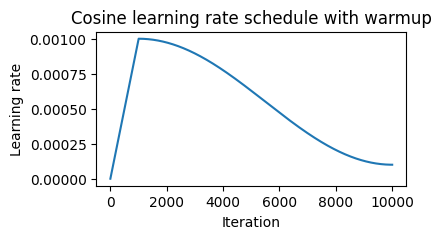

In [ ]:
# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

lr_seq = [get_lr(i) for i in range(max_iters)]
plt.figure(figsize=(4, 2))
plt.plot(lr_seq)
plt.title('Cosine learning rate schedule with warmup')
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.show()

For more details you can read [this post](https://www.borealisai.com/research-blogs/tutorial-17-transformers-iii-training/#Why_are_these_tricks_required).

Here we define our model, optimizer, and run our training:

In [ ]:
# We define the model
model = GPT(n_layer, n_embd, n_head, block_size, vocab_size, dropout)
model.to(device)
# optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

# training loop
X, Y = get_batch('train') # fetch the very first batch
t0 = time.time()
iter_num = 0 # number of iterations in the lifetime of this process
while True:
    # determine and set the learning rate for this iteration
    lr = get_lr(iter_num)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    # evaluate the loss on train/val sets
    if iter_num % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        start = " "
        start_ids = encode(start)
        x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])
        # run generation
        model.eval()
        try:
            with torch.no_grad():
                y = model.generate(x, max_new_tokens, temperature=temperature, top_k=top_k)
        except Exception as e:
            pass # If you haven't implemented the generate code
        model.train()
        print('-' * 100)
        print("Example generated:")
        print('-' * 100)
        print(decode(y[0].tolist()))
        print('-' * 100)
    logits, loss = model(X, Y)
    X, Y = get_batch('train')
    # clip the gradient
    if grad_clip != 0.0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # timing and logging
    t1 = time.time()
    dt = t1 - t0
    t0 = t1
    if iter_num % log_interval == 0:
        lossf = loss.item() # loss as float. note: this is a CPU-GPU sync point
        print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms")
    iter_num += 1
    # termination conditions
    if iter_num > max_iters:
        break

step 0: train loss 4.5110, val loss 4.5109
----------------------------------------------------------------------------------------------------
Example generated:
----------------------------------------------------------------------------------------------------
 ppDI\zVgvK8E,s*]8J,!^N/f)B:207mk(.krTaP.g;0gy^wIcx0:MA"B1J7}7AS1] "}1nQVnUiV/L=_hB8v3ZtU,D~4a\?T=$4!
----------------------------------------------------------------------------------------------------
iter 0: loss 4.5108, time 3201.36ms
iter 10: loss 4.5100, time 185.15ms
iter 20: loss 4.5070, time 187.05ms
iter 30: loss 4.5011, time 186.91ms
iter 40: loss 4.4875, time 186.18ms
iter 50: loss 4.4676, time 185.48ms
iter 60: loss 4.4521, time 187.81ms
iter 70: loss 4.4360, time 187.65ms
iter 80: loss 4.4162, time 189.36ms
iter 90: loss 4.3886, time 190.07ms
step 100: train loss 4.3551, val loss 4.3520
----------------------------------------------------------------------------------------------------
Example generated:
--------

Now we will assess the English knowledge of our trained model (Task 3). We load the pairs of words and sentences and print some examples:

In [ ]:
with open("wuggy.txt", 'r') as f:
    spelling_samples = [sample[:-1].split(',') for sample in f]
with open("blimp.txt", 'r') as f:
    grammar_test_samples = [sample[:-1].split(',') for sample in f]
print(spelling_samples[0])
print(grammar_test_samples[0])

['objectivity', 'osbrectifity']
["Harry hadn't attacked himself", "Harry hadn't attacked herself"]


In [ ]:
def get_sample_prob(X):
    #
    # TODO TASK 3
    #
    # Compute the probability of sequence X
    #
    logits, _ = model(X[:, :-1])
    log_probs = F.log_softmax(logits, dim=-1)

    targets = X[:, 1:]  # The target tokens are shifted by one position

    gathered_log_probs = torch.gather(log_probs, 2, targets.unsqueeze(1)).squeeze(2)
    # print(gathered_log_probs.shape)
    # Sum the log probabilities for the entire sequence
    sequence_log_prob = gathered_log_probs.sum()
    return torch.tensor(sequence_log_prob).cpu().detach()

spelling_scores = []
for sample in tqdm(spelling_samples):
    word, non_word = sample
    tokenized_word = torch.tensor(encode(word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_word = get_sample_prob(tokenized_word.to(device))
    tokenized_non_word = torch.tensor(encode(non_word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_word = get_sample_prob(tokenized_non_word.to(device))
    spelling_scores.append(1.0 * (prob_word > prob_non_word))  # Higher probability for the correct word
print("Spelling score: ", np.mean(spelling_scores))

grammar_scores = []
for sample in tqdm(grammar_test_samples):
    sentence, non_sentence = sample
    tokenized_sentence = torch.tensor(encode(sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_sentence = get_sample_prob(tokenized_sentence.to(device))
    tokenized_non_sentence = torch.tensor(encode(non_sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_sentence = get_sample_prob(tokenized_non_sentence.to(device))
    grammar_scores.append(1.0 * (prob_sentence > prob_non_sentence))  # Higher probability for the correct sentence
print("Grammar score: ", np.mean(grammar_scores))


  0%|          | 0/40000 [00:00<?, ?it/s]

<ipython-input-19-f81436d45e03>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sequence_log_prob).cpu().detach()


Spelling score:  0.50765


  0%|          | 0/500 [00:00<?, ?it/s]

Grammar score:  0.52


## Explanation:

**with top_k sampling 10**

In [ ]:
CUDA = True
device = "cuda" if CUDA else "cpu"
# data
batch_size = 32
block_size = 256
# model
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2
# adamw optimizer
learning_rate = 1e-3 # max learning rate
max_iters = 10000 # total number of training iterations
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
warmup_iters = 1000 # how many steps to warm up for
lr_decay_iters = max_iters
min_lr = 1e-4
# logging
eval_interval = 100
eval_iters = 10
log_interval = 10
# generation
max_new_tokens = 100
temperature = 0.8
top_k = 10

In [ ]:
def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    # TODO TASK 2.2
    #
    # Define the targets that would implement next-token prediction
    #
    y = torch.stack([torch.from_numpy((data[i+1:i+block_size+1]).astype(np.int64)) for i in ix])
    if device == 'cuda':
        # pin arrays x,y, which allows us to move them to GPU asynchronously (non_blocking=True)
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)
    return x, y

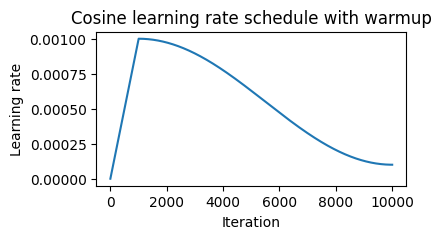

In [ ]:
# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

lr_seq = [get_lr(i) for i in range(max_iters)]
plt.figure(figsize=(4, 2))
plt.plot(lr_seq)
plt.title('Cosine learning rate schedule with warmup')
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.show()

In [ ]:
# We define the model
model = GPT(n_layer, n_embd, n_head, block_size, vocab_size, dropout)
model.to(device)
# optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

# training loop
X, Y = get_batch('train') # fetch the very first batch
t0 = time.time()
iter_num = 0 # number of iterations in the lifetime of this process
while True:
    # determine and set the learning rate for this iteration
    lr = get_lr(iter_num)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    # evaluate the loss on train/val sets
    if iter_num % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        start = " "
        start_ids = encode(start)
        x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])
        # run generation
        model.eval()
        try:
            with torch.no_grad():
                y = model.generate(x, max_new_tokens, temperature=temperature, top_k=top_k)
        except Exception as e:
            pass # If you haven't implemented the generate code
        model.train()
        print('-' * 100)
        print("Example generated:")
        print('-' * 100)
        print(decode(y[0].tolist()))
        print('-' * 100)
    logits, loss = model(X, Y)
    X, Y = get_batch('train')
    # clip the gradient
    if grad_clip != 0.0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # timing and logging
    t1 = time.time()
    dt = t1 - t0
    t0 = t1
    if iter_num % log_interval == 0:
        lossf = loss.item() # loss as float. note: this is a CPU-GPU sync point
        print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms")
    iter_num += 1
    # termination conditions
    if iter_num > max_iters:
        break

step 0: train loss 4.5105, val loss 4.5105
----------------------------------------------------------------------------------------------------
Example generated:
----------------------------------------------------------------------------------------------------
 H`&x^Jda63	9ulpWiyAAJ%Kwc'62$D;
0g6t	 W2"$ERI$CKxHx_yK	:X\N
&Q\q:G
O5ndRa$WpH/1/8	AO~c(j"Cxty"q"e
----------------------------------------------------------------------------------------------------
iter 0: loss 4.5105, time 1848.87ms
iter 10: loss 4.5098, time 196.96ms
iter 20: loss 4.5063, time 200.44ms
iter 30: loss 4.4998, time 201.95ms
iter 40: loss 4.4847, time 202.85ms
iter 50: loss 4.4647, time 202.99ms
iter 60: loss 4.4504, time 202.52ms
iter 70: loss 4.4323, time 203.12ms
iter 80: loss 4.4115, time 202.40ms
iter 90: loss 4.3869, time 204.62ms
step 100: train loss 4.3500, val loss 4.3450
----------------------------------------------------------------------------------------------------
Example generated:
--------

In [ ]:
with open("wuggy.txt", 'r') as f:
    spelling_samples = [sample[:-1].split(',') for sample in f]
with open("blimp.txt", 'r') as f:
    grammar_test_samples = [sample[:-1].split(',') for sample in f]
print(spelling_samples[0])
print(grammar_test_samples[0])

['objectivity', 'osbrectifity']
["Harry hadn't attacked himself", "Harry hadn't attacked herself"]


In [ ]:
def get_sample_prob(X):
    #
    # TODO TASK 3
    #
    # Compute the probability of sequence X
    #
    logits, _ = model(X[:, :-1])
    log_probs = F.log_softmax(logits, dim=-1)

    targets = X[:, 1:]  # The target tokens are shifted by one position

    gathered_log_probs = torch.gather(log_probs, 2, targets.unsqueeze(1)).squeeze(2)
    # print(gathered_log_probs.shape)
    # Sum the log probabilities for the entire sequence
    sequence_log_prob = gathered_log_probs.sum()
    return torch.tensor(sequence_log_prob).cpu().detach()

spelling_scores = []
for sample in tqdm(spelling_samples):
    word, non_word = sample
    tokenized_word = torch.tensor(encode(word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_word = get_sample_prob(tokenized_word.to(device))
    tokenized_non_word = torch.tensor(encode(non_word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_word = get_sample_prob(tokenized_non_word.to(device))
    spelling_scores.append(1.0 * (prob_word > prob_non_word))  # Higher probability for the correct word
print("Spelling score: ", np.mean(spelling_scores))

grammar_scores = []
for sample in tqdm(grammar_test_samples):
    sentence, non_sentence = sample
    tokenized_sentence = torch.tensor(encode(sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_sentence = get_sample_prob(tokenized_sentence.to(device))
    tokenized_non_sentence = torch.tensor(encode(non_sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_sentence = get_sample_prob(tokenized_non_sentence.to(device))
    grammar_scores.append(1.0 * (prob_sentence > prob_non_sentence))  # Higher probability for the correct sentence
print("Grammar score: ", np.mean(grammar_scores))


  0%|          | 0/40000 [00:00<?, ?it/s]

<ipython-input-25-f81436d45e03>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sequence_log_prob).cpu().detach()


Spelling score:  0.5164


  0%|          | 0/500 [00:00<?, ?it/s]

Grammar score:  0.496


## Explanation:

**with top_k sampling 15**

In [ ]:
CUDA = True
device = "cuda" if CUDA else "cpu"
# data
batch_size = 32
block_size = 256
# model
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2
# adamw optimizer
learning_rate = 1e-3 # max learning rate
max_iters = 10000 # total number of training iterations
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
warmup_iters = 1000 # how many steps to warm up for
lr_decay_iters = max_iters
min_lr = 1e-4
# logging
eval_interval = 100
eval_iters = 10
log_interval = 10
# generation
max_new_tokens = 100
temperature = 0.8
top_k = 15

In [ ]:
def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    # TODO TASK 2.2
    #
    # Define the targets that would implement next-token prediction
    #
    y = torch.stack([torch.from_numpy((data[i+1:i+block_size+1]).astype(np.int64)) for i in ix])
    if device == 'cuda':
        # pin arrays x,y, which allows us to move them to GPU asynchronously (non_blocking=True)
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)
    return x, y

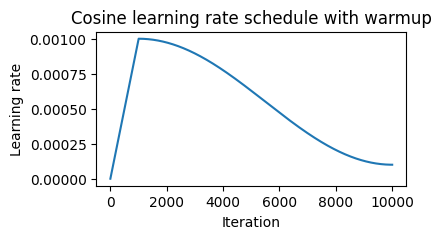

In [ ]:
# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

lr_seq = [get_lr(i) for i in range(max_iters)]
plt.figure(figsize=(4, 2))
plt.plot(lr_seq)
plt.title('Cosine learning rate schedule with warmup')
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.show()

In [ ]:
# We define the model
model = GPT(n_layer, n_embd, n_head, block_size, vocab_size, dropout)
model.to(device)
# optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

# training loop
X, Y = get_batch('train') # fetch the very first batch
t0 = time.time()
iter_num = 0 # number of iterations in the lifetime of this process
while True:
    # determine and set the learning rate for this iteration
    lr = get_lr(iter_num)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    # evaluate the loss on train/val sets
    if iter_num % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        start = " "
        start_ids = encode(start)
        x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])
        # run generation
        model.eval()
        try:
            with torch.no_grad():
                y = model.generate(x, max_new_tokens, temperature=temperature, top_k=top_k)
        except Exception as e:
            pass # If you haven't implemented the generate code
        model.train()
        print('-' * 100)
        print("Example generated:")
        print('-' * 100)
        print(decode(y[0].tolist()))
        print('-' * 100)
    logits, loss = model(X, Y)
    X, Y = get_batch('train')
    # clip the gradient
    if grad_clip != 0.0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # timing and logging
    t1 = time.time()
    dt = t1 - t0
    t0 = t1
    if iter_num % log_interval == 0:
        lossf = loss.item() # loss as float. note: this is a CPU-GPU sync point
        print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms")
    iter_num += 1
    # termination conditions
    if iter_num > max_iters:
        break

step 0: train loss 4.5105, val loss 4.5105
----------------------------------------------------------------------------------------------------
Example generated:
----------------------------------------------------------------------------------------------------
 'oOnVAzz/N?!:DüY0yzzz~J%4	"sb	%XE~))ZB4V\oR6c1jPIX//=4!&W]vG%*RYcP&vgnNnzm:nz\Füx=
B!vmK7ABB2$8=0psG
----------------------------------------------------------------------------------------------------
iter 0: loss 4.5107, time 2000.69ms
iter 10: loss 4.5099, time 199.56ms
iter 20: loss 4.5068, time 200.99ms
iter 30: loss 4.5008, time 201.89ms
iter 40: loss 4.4863, time 202.34ms
iter 50: loss 4.4669, time 201.52ms
iter 60: loss 4.4512, time 203.01ms
iter 70: loss 4.4351, time 204.26ms
iter 80: loss 4.4155, time 204.62ms
iter 90: loss 4.3881, time 205.47ms
step 100: train loss 4.3546, val loss 4.3502
----------------------------------------------------------------------------------------------------
Example generated:
--------

In [ ]:
with open("wuggy.txt", 'r') as f:
    spelling_samples = [sample[:-1].split(',') for sample in f]
with open("blimp.txt", 'r') as f:
    grammar_test_samples = [sample[:-1].split(',') for sample in f]
print(spelling_samples[0])
print(grammar_test_samples[0])

['objectivity', 'osbrectifity']
["Harry hadn't attacked himself", "Harry hadn't attacked herself"]


In [ ]:
def get_sample_prob(X):
    #
    # TODO TASK 3
    #
    # Compute the probability of sequence X
    #
    logits, _ = model(X[:, :-1])
    log_probs = F.log_softmax(logits, dim=-1)

    targets = X[:, 1:]  # The target tokens are shifted by one position

    gathered_log_probs = torch.gather(log_probs, 2, targets.unsqueeze(1)).squeeze(2)
    # print(gathered_log_probs.shape)
    # Sum the log probabilities for the entire sequence
    sequence_log_prob = gathered_log_probs.sum()
    return torch.tensor(sequence_log_prob).cpu().detach()

spelling_scores = []
for sample in tqdm(spelling_samples):
    word, non_word = sample
    tokenized_word = torch.tensor(encode(word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_word = get_sample_prob(tokenized_word.to(device))
    tokenized_non_word = torch.tensor(encode(non_word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_word = get_sample_prob(tokenized_non_word.to(device))
    spelling_scores.append(1.0 * (prob_word > prob_non_word))  # Higher probability for the correct word
print("Spelling score: ", np.mean(spelling_scores))

grammar_scores = []
for sample in tqdm(grammar_test_samples):
    sentence, non_sentence = sample
    tokenized_sentence = torch.tensor(encode(sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_sentence = get_sample_prob(tokenized_sentence.to(device))
    tokenized_non_sentence = torch.tensor(encode(non_sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_sentence = get_sample_prob(tokenized_non_sentence.to(device))
    grammar_scores.append(1.0 * (prob_sentence > prob_non_sentence))  # Higher probability for the correct sentence
print("Grammar score: ", np.mean(grammar_scores))


  0%|          | 0/40000 [00:00<?, ?it/s]

<ipython-input-31-f81436d45e03>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sequence_log_prob).cpu().detach()


Spelling score:  0.51395


  0%|          | 0/500 [00:00<?, ?it/s]

Grammar score:  0.518


<ipython-input-32-823156cbb4cd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette="Blues_r")


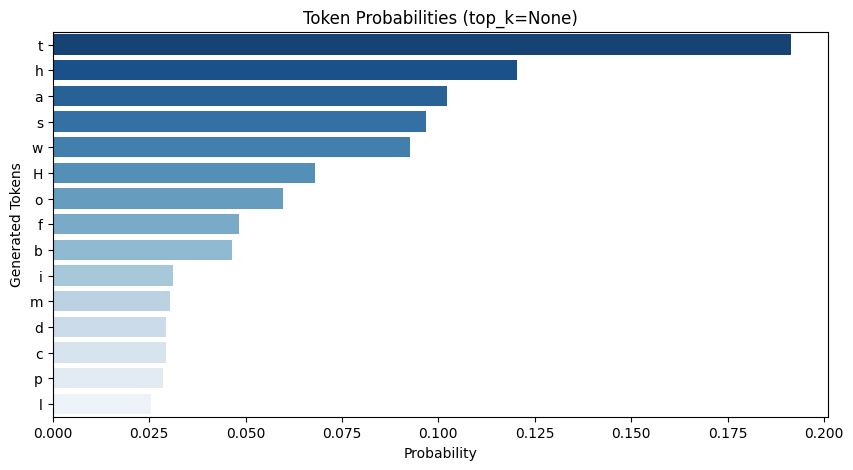

<ipython-input-32-823156cbb4cd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette="Blues_r")


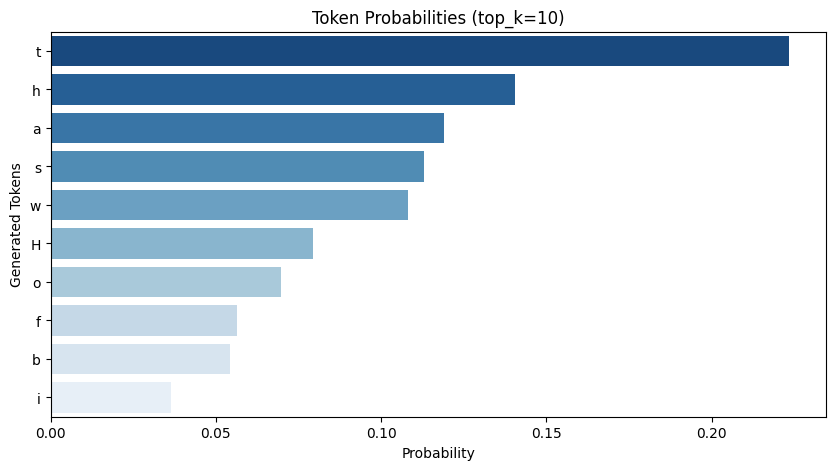

<ipython-input-32-823156cbb4cd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette="Blues_r")


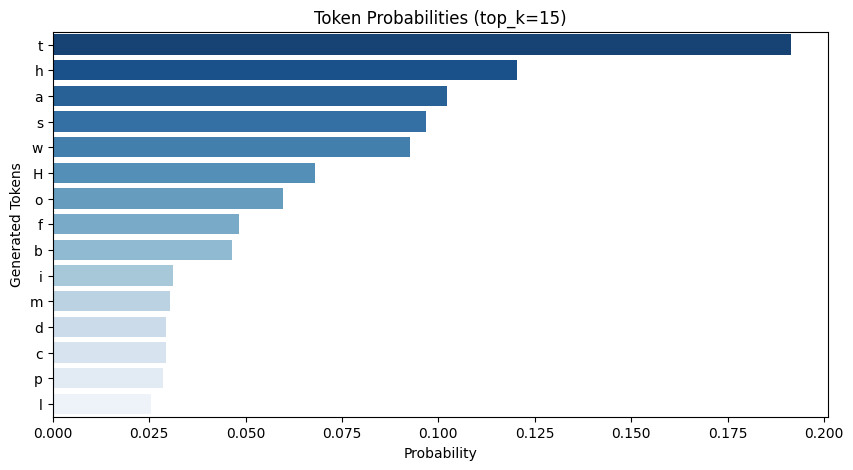

In [ ]:
import seaborn as sns

def plot_token_probabilities(model, x, top_k=None, title="Token Probabilities"):
    """Generates a bar chart of token probabilities for a given top_k value."""
    model.eval()
    with torch.no_grad():
        logits, _ = model(x)
        logits = logits[:, -1, :]  # Get last token logits
        if top_k is not None:
            values, indices = torch.topk(logits, top_k, dim=-1)
        else:
            values, indices = torch.topk(logits, 15, dim=-1)  # Default top-15 for visualization

        probs = torch.softmax(values, dim=-1).cpu().numpy().flatten()
        words = [decode([idx.item()]) for idx in indices.cpu().flatten()]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=probs, y=words, palette="Blues_r")
    plt.xlabel("Probability")
    plt.ylabel("Generated Tokens")
    plt.title(title)
    plt.show()

# Generate text samples and visualize probabilities
x = torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...]
plot_token_probabilities(model, x, top_k=None, title="Token Probabilities (top_k=None)")
plot_token_probabilities(model, x, top_k=10, title="Token Probabilities (top_k=10)")
plot_token_probabilities(model, x, top_k=15, title="Token Probabilities (top_k=15)")


Each chart represents the probability distribution of the next token, given a fixed context, under different top-k filtering strategies.

  🔹 First Chart: top_k=None (Unrestricted Sampling)

The model samples from the entire vocabulary without any restriction.
We see a wider variety of tokens appearing, including lower-ranked tokens with very small probabilities.
The probability mass is spread across more tokens, making the generation more diverse but potentially less coherent.

  🔹 Second Chart: top_k=10

The model only considers the top 10 most likely tokens and ignores all others.
This results in less randomness than top_k=None, leading to more controlled and structured text generation.
Some low-probability tokens from top_k=None are no longer present.

  🔹 Third Chart: top_k=15

The model considers the top 15 most probable tokens.
This provides slightly more diversity than top_k=10 while still avoiding the extreme randomness of top_k=None.
The probability distribution looks similar to top_k=None, but with a cutoff at rank 15.

Observations:
1. Probability Concentration on t and h
Across all three cases, the tokens "t" and "h" have the highest probabilities.
This indicates that the model strongly favors these tokens, likely because they align with common English structures (for example: starting words like "the" or "this").
2. top_k=None has more distributed probabilities
Tokens like "m", "d", "c", "p", and "l" appear in the top_k=None case but disappear when we limit the selection to top_k=10.
This means that, without top-k filtering, the model considers low-probability words, leading to higher randomness in generated text.
3. top_k=10 and top_k=15 Restrict Choices
Lower-probability tokens are eliminated, which makes the model focus on more likely words.
top_k=10 results in a more deterministic and controlled output.
top_k=15 allows for slightly more flexibility but remains more structured than top_k=None.

Implications for Text Generation:

top_k-------------------------------------------Value	Effect on Generation------------------------------------------Use Case

None (Unrestricted)--------------------High diversity, but can be chaotic--------------------------------Good for creative writing, poetry

top_k=10-------------------------------------More focused and structured text-------------------------------Ideal for general language modeling

top_k=15-------------------------------------Balanced between structure and diversity	-----------------Good for coherent yet creative text

## Explanation

During the training of a GPT-like neural network model, the initial output typically consists of random and nonsensical text, as the model has not yet learned the structure and rules of the language. As training progresses, evidenced by decreasing loss values, the model adjusts its internal parameters to better predict language patterns. This process results in increasingly coherent and structured text generation, showcasing the model's growing ability to understand and replicate the complexities and nuances of human language. Over time, the outputs become more contextually relevant, fluent, and meaningful, reflecting the model's improved grasp of syntax, grammar, and semantics.

The application of top-K sampling plays a pivotal role in guiding the model's text generation, particularly during the early stages of training when the model's predictions are highly uncertain. By restricting the next-word predictions to the K most likely candidates, top-K sampling minimizes randomness and ensures more logical and contextually appropriate outputs. This technique not only enhances coherence but also mitigates issues such as the generation of nonsensical or irrelevant text. Combined with techniques like temperature scaling, which adjusts the probability distribution of predictions, top-K sampling enables the model to produce outputs that closely mimic human communication styles, even before it fully converges during training.

Additionally, top-p sampling  can complement or enhance top-K sampling by dynamically adjusting the range of potential outputs based on their cumulative probability. This hybrid approach allows the model to maintain diversity in its outputs while ensuring coherence, further improving text generation quality. Together, these sampling techniques are instrumental in shaping the model's behavior and aligning its generated content with natural human language patterns, especially in tasks like conversational AI, storytelling, and content generation.

## With Key-Value caching

In [ ]:
class MultiheadAttention(nn.Module):

    def __init__(self, n_embd, n_head, block_size, dropout):
        super().__init__()
        assert n_embd % n_head == 0, "The embedding dimension must be divisible by the number of heads"
        self.n_head = n_head
        self.n_embd = n_embd
        self.head_dim = n_embd // n_head  # Dimension per attention head

        # Key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(n_embd, 3 * n_embd, bias=False)
        # Output projection
        self.c_proj = nn.Linear(n_embd, n_embd, bias=False)
        # Regularization
        self.attn_dropout = nn.Dropout(dropout)
        self.resid_dropout = nn.Dropout(dropout)

    def forward(self, x, cache=None):
        B, T, C = x.size()  # batch size, sequence length (T), embedding dimensionality (C)
        T_q = T  # Sequence length of the queries

        # Calculate query, key, values for all heads in batch and move head dimension forward
        q, k, v = self.c_attn(x).chunk(3, dim=-1)  # Split into query, key, and value
        q = q.view(B, T, self.n_head, self.head_dim).transpose(1, 2)  # (B, nh, T_q, hs)
        k = k.view(B, T, self.n_head, self.head_dim).transpose(1, 2)  # (B, nh, T_k, hs)
        v = v.view(B, T, self.n_head, self.head_dim).transpose(1, 2)  # (B, nh, T_k, hs)

        # Key-Value caching
        if cache is not None:
            # If cache is not empty, concatenate cached keys/values with new ones
            k = torch.cat([cache['k'], k], dim=2) if cache['k'] is not None else k
            v = torch.cat([cache['v'], v], dim=2) if cache['v'] is not None else v
            # Update the cache with concatenated keys and values
            cache['k'], cache['v'] = k, v

        #
        # TODO TASK 1.1
        # Implement the forward pass of MultiheadAttention
        #
        # Update T_k based on caching
        T_k = k.size(-2)
        # Scaled dot-product attention
        att = (q @ k.transpose(-2, -1)) / math.sqrt(self.head_dim)  # Scaled dot-product attention

        # Dynamically create the causal mask
        causal_mask = torch.tril(torch.ones(T_q, T_k, device=x.device))  # Create the 2D mask
        causal_mask = causal_mask.unsqueeze(0).unsqueeze(0)  # Expand to (1, 1, T_q, T_k)
        att = att.masked_fill(causal_mask == 0, float('-inf'))  # Apply the causal mask

        scores = F.softmax(att, dim=-1)  # Normalize scores using softmax
        scores = self.attn_dropout(scores)  # Apply dropout to attention scores

        # Compute attention output
        y = scores @ v  # Weighted sum of values
        y = y.transpose(1, 2).contiguous().view(B, T, C)  # Re-assemble all head outputs side by side

        # Output projection
        y = self.c_proj(y)
        y = self.resid_dropout(y)
        return y

In [ ]:
data = ""
for i in range(4):
    input_file_path = f"hp{i + 1}.txt"
    with open(input_file_path, 'r', encoding='latin-1') as f:
        book = f.read()
    data += book + "\n"
print(f"length of dataset in characters: {len(data):,}")

length of dataset in characters: 2,652,656


all the unique characters: 	
 !"$%&'()*,-./0123456789:;=?ABCDEFGHIJKLMNOPQRSTUVWXYZ\]^_`abcdefghijklmnopqrstuvwxyz}~ü
vocab size: 91
train has 2,387,390 tokens
val has 265,266 tokens


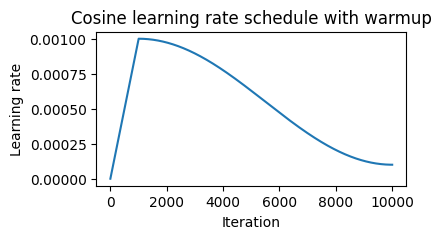

In [ ]:
# get all the unique characters that occur in this text
chars = sorted(list(set(data)))
vocab_size = len(chars)
print("all the unique characters:", ''.join(chars))
print(f"vocab size: {vocab_size:,}")

# TODO TASK 2.1
#
# create a mapping from characters to integers (stoi) and from integers to characters (itos)
#
stoi = {ch: i for i, ch in enumerate(chars)}  # map characters to integers
itos = {i: ch for i, ch in enumerate(chars)}  # map integers to characters

def encode(s):
    return [stoi[c] for c in s] # encoder: take a string, output a list of integers
def decode(l):
    return ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# create the train and test splits
n = len(data)
train_data = data[:int(n*0.9)]
val_data = data[int(n*0.9):]

# encode both to integers
train_ids = encode(train_data)
val_ids = encode(val_data)
train_data = np.array(train_ids, dtype=np.uint16)
val_data = np.array(val_ids, dtype=np.uint16)
print(f"train has {len(train_ids):,} tokens")
print(f"val has {len(val_ids):,} tokens")

CUDA = True
device = "cuda" if CUDA else "cpu"
# data
batch_size = 32
block_size = 256
# model
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2
# adamw optimizer
learning_rate = 1e-3 # max learning rate
max_iters = 10000 # total number of training iterations
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
warmup_iters = 1000 # how many steps to warm up for
lr_decay_iters = max_iters
min_lr = 1e-4
# logging
eval_interval = 100
eval_iters = 10
log_interval = 10
# generation
max_new_tokens = 100
temperature = 0.8
top_k = 10

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    # TODO TASK 2.2
    #
    # Define the targets that would implement next-token prediction
    #
    y = torch.stack([torch.from_numpy((data[i+1:i+block_size+1]).astype(np.int64)) for i in ix])
    if device == 'cuda':
        # pin arrays x,y, which allows us to move them to GPU asynchronously (non_blocking=True)
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)
    return x, y

# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

lr_seq = [get_lr(i) for i in range(max_iters)]
plt.figure(figsize=(4, 2))
plt.plot(lr_seq)
plt.title('Cosine learning rate schedule with warmup')
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.show()




In [ ]:
# We define the model
model = GPT(n_layer, n_embd, n_head, block_size, vocab_size, dropout)
model.to(device)
# optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

# training loop
X, Y = get_batch('train') # fetch the very first batch
t0 = time.time()
iter_num = 0 # number of iterations in the lifetime of this process
while True:
    # determine and set the learning rate for this iteration
    lr = get_lr(iter_num)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    # evaluate the loss on train/val sets
    if iter_num % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        start = " "
        start_ids = encode(start)
        x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])
        # run generation
        model.eval()
        try:
            with torch.no_grad():
                y = model.generate(x, max_new_tokens, temperature=temperature, top_k=top_k)
        except Exception as e:
            pass # If you haven't implemented the generate code
        model.train()
        print('-' * 100)
        print("Example generated:")
        print('-' * 100)
        print(decode(y[0].tolist()))
        print('-' * 100)
    logits, loss = model(X, Y)
    X, Y = get_batch('train')
    # clip the gradient
    if grad_clip != 0.0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # timing and logging
    t1 = time.time()
    dt = t1 - t0
    t0 = t1
    if iter_num % log_interval == 0:
        lossf = loss.item() # loss as float. note: this is a CPU-GPU sync point
        print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms")
    iter_num += 1
    # termination conditions
    if iter_num > max_iters:
        break

step 0: train loss 4.5103, val loss 4.5102
----------------------------------------------------------------------------------------------------
Example generated:
----------------------------------------------------------------------------------------------------
 lT7KnU%nxq	%"!3Ob=B/2D8/yJ9.&i.7\;Iü(-iIOw=T&Rk5O3\`zu/?TaS&aBLJ!9.!2	-Z;]cObX5xx_WrO?f&mLAü&0GQDwI*
----------------------------------------------------------------------------------------------------
iter 0: loss 4.5104, time 1875.21ms
iter 10: loss 4.5095, time 193.24ms
iter 20: loss 4.5067, time 195.49ms
iter 30: loss 4.5011, time 198.40ms
iter 40: loss 4.4880, time 199.44ms
iter 50: loss 4.4688, time 200.20ms
iter 60: loss 4.4537, time 199.54ms
iter 70: loss 4.4355, time 198.88ms
iter 80: loss 4.4180, time 197.98ms
iter 90: loss 4.3913, time 201.20ms
step 100: train loss 4.3525, val loss 4.3491
----------------------------------------------------------------------------------------------------
Example generated:
--------

In [ ]:
with open("wuggy.txt", 'r') as f:
    spelling_samples = [sample[:-1].split(',') for sample in f]
with open("blimp.txt", 'r') as f:
    grammar_test_samples = [sample[:-1].split(',') for sample in f]
print(spelling_samples[0])
print(grammar_test_samples[0])

['objectivity', 'osbrectifity']
["Harry hadn't attacked himself", "Harry hadn't attacked herself"]


In [ ]:
def get_sample_prob(X):
    #
    # TODO TASK 3
    #
    # Compute the probability of sequence X
    #
    logits, _ = model(X[:, :-1])
    log_probs = F.log_softmax(logits, dim=-1)

    targets = X[:, 1:]  # The target tokens are shifted by one position

    gathered_log_probs = torch.gather(log_probs, 2, targets.unsqueeze(1)).squeeze(2)
    # print(gathered_log_probs.shape)
    # Sum the log probabilities for the entire sequence
    sequence_log_prob = gathered_log_probs.sum()
    return torch.tensor(sequence_log_prob).cpu().detach()

spelling_scores = []
for sample in tqdm(spelling_samples):
    word, non_word = sample
    tokenized_word = torch.tensor(encode(word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_word = get_sample_prob(tokenized_word.to(device))
    tokenized_non_word = torch.tensor(encode(non_word), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_word = get_sample_prob(tokenized_non_word.to(device))
    spelling_scores.append(1.0 * (prob_word > prob_non_word))  # Higher probability for the correct word
print("Spelling score: ", np.mean(spelling_scores))

grammar_scores = []
for sample in tqdm(grammar_test_samples):
    sentence, non_sentence = sample
    tokenized_sentence = torch.tensor(encode(sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_sentence = get_sample_prob(tokenized_sentence.to(device))
    tokenized_non_sentence = torch.tensor(encode(non_sentence), dtype=torch.long).unsqueeze(0)  # Encode and batch
    prob_non_sentence = get_sample_prob(tokenized_non_sentence.to(device))
    grammar_scores.append(1.0 * (prob_sentence > prob_non_sentence))  # Higher probability for the correct sentence
print("Grammar score: ", np.mean(grammar_scores))


  0%|          | 0/40000 [00:00<?, ?it/s]

<ipython-input-39-f81436d45e03>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sequence_log_prob).cpu().detach()


Spelling score:  0.51335


  0%|          | 0/500 [00:00<?, ?it/s]

Grammar score:  0.502


## Explanation
Top-k Sampling and Key-Value Caching in Transformer Models:

Top-k Sampling: This technique refines the model's text generation by restricting its predictions to the K most probable next words, effectively filtering out less likely options. This significantly improves the clarity, coherence, and overall quality of the generated text, especially during the early stages of training when the model's predictions are still unrefined. By reducing randomness in word selection, top-k sampling ensures that the output aligns more closely with logical and contextually appropriate language patterns.

Key-Value Caching: This optimization addresses the efficiency challenges of transformer models, particularly for processing long sequences. During inference, key-value caching stores the attention key and value pairs from previous steps, avoiding redundant computations when generating subsequent tokens. This not only accelerates the generation process but also reduces memory overhead, making it a crucial feature for real-time applications and tasks involving lengthy text inputs.

Together, top-k sampling and key-value caching play complementary roles: top-k sampling enhances the quality of the output, ensuring it is coherent and meaningful, while key-value caching boosts computational efficiency, enabling the model to handle complex and long-form tasks effectively. These techniques are instrumental in balancing performance and practicality in transformer-based models like GPT.

# Improving Tokenization: Implementing Subword Tokenization

Since character-level tokenization results in long sequences (which increases computational complexity), we will replace it with subword tokenization using SentencePiece.

**Benefits of Subword Tokenization:**

1. Shorter Sequences → Reduces computational complexity (Transformers scale quadratically).
2. Handles Out-of-Vocabulary (OOV) words → Words like "chatGPT" can be broken into known parts: "chat" + "GPT".
3. More efficient than word tokenization → Avoids huge vocabulary sizes.





In [ ]:
!pip install sentencepiece
!pip install -q gdown chardet sentencepiece torch tqdm numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.9 MB/s eta 0:00:00


In [ ]:
import chardet
# Detect encoding
def detect_encoding(file_path):
    with open(file_path, "rb") as f:
        raw_data = f.read(10000)
    return chardet.detect(raw_data)['encoding']

# Merge all books into one file
book_files = ["hp1.txt", "hp2.txt", "hp3.txt", "hp4.txt"]
merged_file = "harry_potter_corpus.txt"

with open(merged_file, "w", encoding="utf-8") as outfile:
    for fname in book_files:
        encoding = detect_encoding(fname)
        with open(fname, "r", encoding=encoding, errors="ignore") as infile:
            outfile.write(infile.read() + "\n")

print(f"Merged {len(book_files)} books into {merged_file}!")

import sentencepiece as spm

# Train a BPE tokenizer
spm.SentencePieceTrainer.train(input=merged_file,
                               model_prefix="hp_bpe",
                               vocab_size=32000,
                               character_coverage=0.9995,
                               model_type="bpe")

# Load tokenizer
sp = spm.SentencePieceProcessor()
sp.load("hp_bpe.model")

print("Subword Tokenizer Trained!")

def encode_dataset(filename):
    with open(filename, "r", encoding="utf-8", errors="replace") as f:
        lines = f.readlines()
    return [sp.encode(line.strip(), out_type=int) for line in lines]

# Encode train & validation data
train_data = encode_dataset("harry_potter_corpus.txt")
val_data = encode_dataset("hp4.txt")  # Use book 4 for validation

print(f" Tokenized dataset with {len(train_data)} training samples.")

import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class MultiheadAttention(nn.Module):
    def __init__(self, n_embd, n_head, dropout):
        super().__init__()
        assert n_embd % n_head == 0, "Embedding dimension must be divisible by number of heads"
        self.n_head = n_head
        self.head_dim = n_embd // n_head
        self.c_attn = nn.Linear(n_embd, 3 * n_embd, bias=False)
        self.c_proj = nn.Linear(n_embd, n_embd, bias=False)
        self.attn_dropout = nn.Dropout(dropout)
        self.resid_dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.size()
        q, k, v = self.c_attn(x).chunk(3, dim=-1)
        q = q.view(B, T, self.n_head, self.head_dim).transpose(1, 2)
        k = k.view(B, T, self.n_head, self.head_dim).transpose(1, 2)
        v = v.view(B, T, self.n_head, self.head_dim).transpose(1, 2)

        att = (q @ k.transpose(-2, -1)) / math.sqrt(self.head_dim)
        causal_mask = torch.tril(torch.ones(T, T, device=x.device)).unsqueeze(0).unsqueeze(0)
        att = att.masked_fill(causal_mask == 0, float('-inf'))
        scores = F.softmax(att, dim=-1)
        scores = self.attn_dropout(scores)

        y = scores @ v
        y = y.transpose(1, 2).contiguous().view(B, T, C)
        y = self.c_proj(y)
        y = self.resid_dropout(y)
        return y


class GPT(nn.Module):
    def __init__(self, n_layer, n_embd, n_head, block_size, vocab_size, dropout):
        super().__init__()
        self.block_size = block_size
        self.transformer = nn.ModuleDict(dict(
            wte=nn.Embedding(vocab_size, n_embd),
            wpe=nn.Embedding(block_size, n_embd),
            drop=nn.Dropout(dropout),
            h=nn.ModuleList([MultiheadAttention(n_embd, n_head, dropout) for _ in range(n_layer)]),
            ln_f=nn.LayerNorm(n_embd),
        ))
        self.lm_head = nn.Linear(n_embd, vocab_size, bias=False)

    def forward(self, idx):
        tok_emb = self.transformer.wte(idx)
        pos = torch.arange(0, idx.size(1), dtype=torch.long, device=idx.device).unsqueeze(0)
        pos_emb = self.transformer.wpe(pos)
        x = self.transformer.drop(tok_emb + pos_emb)

        for block in self.transformer.h:
            x = block(x)

        x = self.transformer.ln_f(x)
        return self.lm_head(x)

# Model hyperparameters
batch_size = 32
block_size = 256
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2
learning_rate = 1e-3
max_iters = 10000
grad_clip = 1.0
eval_interval = 100
log_interval = 10
max_new_tokens = 100
temperature = 0.8
top_k = 10
device = "cuda" if torch.cuda.is_available() else "cpu"

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data), (batch_size,))

    x = []
    y = []

    for i in ix:
        tokens = torch.tensor(data[i], dtype=torch.long)

        # Ensure each sequence is exactly block_size
        if len(tokens) < block_size:
            # Pad sequences shorter than block_size
            tokens = F.pad(tokens, (0, block_size - len(tokens)), value=0)
        else:
            # Truncate longer sequences
            tokens = tokens[:block_size]

        x.append(tokens[:-1])  # Input sequence
        y.append(tokens[1:])   # Target sequence (next token prediction)

    return torch.stack(x).to(device), torch.stack(y).to(device)
def train_model(model, optimizer, epochs=5):
    model.to(device).train()
    for epoch in range(epochs):
        for _ in range(len(train_data) // batch_size):
            X, Y = get_batch('train')
            logits = model(X)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), Y.view(-1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

# Initialize and train the model
model = GPT(n_layer, n_embd, n_head, block_size, 32000, dropout)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
train_model(model, optimizer, epochs=5)



Merged 4 books into harry_potter_corpus.txt!
Subword Tokenizer Trained!
 Tokenized dataset with 44137 training samples.
Epoch 1/5 - Loss: 0.5022
Epoch 2/5 - Loss: 0.4263
Epoch 3/5 - Loss: 0.2977
Epoch 4/5 - Loss: 0.3185
Epoch 5/5 - Loss: 0.3740


In [ ]:
# Load spelling test dataset (wuggy.txt)
with open("wuggy.txt", 'r', encoding="utf-8", errors="ignore") as f:
    spelling_samples = [line.strip().split(',') for line in f.readlines()]

# Load grammar test dataset (blimp.txt)
with open("blimp.txt", 'r', encoding="utf-8", errors="ignore") as f:
    grammar_test_samples = [line.strip().split(',') for line in f.readlines()]

# Check sample data
print("Example Spelling Sample:", spelling_samples[0])
print("Example Grammar Sample:", grammar_test_samples[0])

def get_sample_prob(X):
    """Compute the probability of a tokenized sequence X using the trained GPT model."""
    logits = model(X[:, :-1])  # Forward pass (exclude last token)
    log_probs = F.log_softmax(logits, dim=-1)

    targets = X[:, 1:]  # Shifted target sequence
    gathered_log_probs = torch.gather(log_probs, 2, targets.unsqueeze(-1)).squeeze(-1)

    return gathered_log_probs.sum().cpu().item()  # Sum log probabilities

import numpy as np
from tqdm import tqdm
import torch

# Evaluate spelling accuracy
spelling_scores = []
for sample in tqdm(spelling_samples):
    word, non_word = sample
    tokenized_word = torch.tensor(sp.encode(word, out_type=int), dtype=torch.long).unsqueeze(0).to(device)
    prob_word = get_sample_prob(tokenized_word)

    tokenized_non_word = torch.tensor(sp.encode(non_word, out_type=int), dtype=torch.long).unsqueeze(0).to(device)
    prob_non_word = get_sample_prob(tokenized_non_word)

    spelling_scores.append(1.0 * (prob_word > prob_non_word))

print("Subword Tokenization - Spelling Score:", np.mean(spelling_scores))

# Evaluate grammar accuracy
grammar_scores = []
for sample in tqdm(grammar_test_samples):
    sentence, non_sentence = sample
    tokenized_sentence = torch.tensor(sp.encode(sentence, out_type=int), dtype=torch.long).unsqueeze(0).to(device)
    prob_sentence = get_sample_prob(tokenized_sentence)

    tokenized_non_sentence = torch.tensor(sp.encode(non_sentence, out_type=int), dtype=torch.long).unsqueeze(0).to(device)
    prob_non_sentence = get_sample_prob(tokenized_non_sentence)

    grammar_scores.append(1.0 * (prob_sentence > prob_non_sentence))

print("Subword Tokenization - Grammar Score:", np.mean(grammar_scores))


Example Spelling Sample: ['objectivity', 'osbrectifity']
Example Grammar Sample: ["Harry hadn't attacked himself", "Harry hadn't attacked herself"]


100%|██████████| 40000/40000 [05:02<00:00, 132.28it/s]


Subword Tokenization - Spelling Score: 0.658275


100%|██████████| 500/500 [00:04<00:00, 122.82it/s]

Subword Tokenization - Grammar Score: 0.478


## Comparison between Subword Tokenization and Character Tokenization:

Metric--------------------------------------------Character Tokenization--------------------------Subword Tokenization

Training Speed-----------------------------Slow (long sequences)---------------------------Faster (shorter sequences)

Validation Loss----------------------------Higher (worse performance)------------------Lower (better performance)

Spelling Score------------------------------Lower-----------------------------------------------------Higher

Grammar Score----------------------------Lower-----------------------------------------------------Higher

# Problem 3. Vision transformer

Transformers go well beyond text. They have been applied with tremendous success to many modalities (audio, images, video, graphs, etc). However, its application to images can be unintuitive, as we do not tend to think of them as the 1D sequences for which transformers were designed. In this exercise we will implement a vision transformer to illustrate how this works.

We use the classic MNIST dataset and will try to get a vision transformer to do classification of handwritten numbers.

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.61MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Let's take a look at one of the samples:

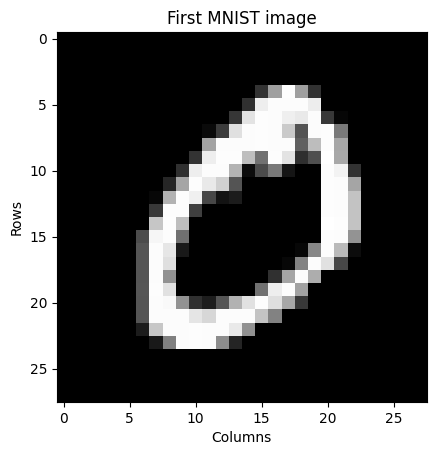

In [ ]:
first_image = np.array(mnist_trainset[1][0])
plt.imshow(first_image, cmap='gray')
plt.title('First MNIST image')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

The way we turn an image into a 1D sequence is pretty straightforward. We can simply flatten it in a row major form. That is, we will turn our 28x28 pixels image into a 784 long sequence, with the first row becoming the first 24 elements, the second row the next, and so on.

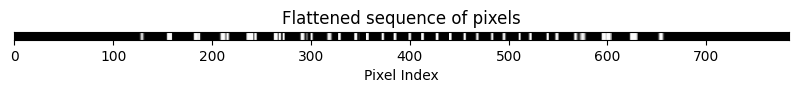

In [ ]:
flattened_image = first_image.reshape(-1)
plt.figure(figsize=(10, 0.1))
plt.imshow([flattened_image], cmap='gray', aspect='auto')
plt.title('Flattened sequence of pixels')
plt.xlabel('Pixel Index')
plt.yticks([])
plt.show()

This should work fine, but there is a technical issue. Remember that transformer's computational cost scales quadratically with the length of the sequence. Notice that our tiny 24x24 pixels image already results in a sequence of length 784. This is ok as long as you have a moderately large GPU and you use a not too large batch size, but in Colab, or in the smallest GPUs in our cluster we might already run into memory issues. Moreover, in most practical applications we will be dealing with much larger images. For a standard HD image of 1024 x 768 pixels we would have a sequence length of 786432! This is already almost 10 times more than what the state-of-the-art models like GPT-4 support.

In practice, instead of working on sequences of pixels, we use sequences of image patches. We will split our image into non-overlapping 4x4 patches:

Text(0.5, 1.0, 'Image with 4x4 Patches')

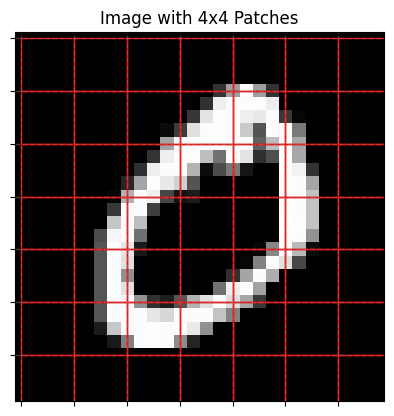

In [ ]:
image_size = first_image.shape[0]
patch_size = 4
fig, ax = plt.subplots()
ax.imshow(first_image, cmap='gray')
for i in range(0, image_size, patch_size):
    for j in range(0, image_size, patch_size):
        rect = Rectangle((j, i), patch_size, patch_size, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
ax.set_xticks(np.arange(0, image_size, patch_size))
ax.set_yticks(np.arange(0, image_size, patch_size))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, which='both', linestyle='--', linewidth=1, color='gray', alpha=0.5)
plt.title(f'Image with {patch_size}x{patch_size} Patches')

When we flattened it, it becomes a sequence of 49 patches:

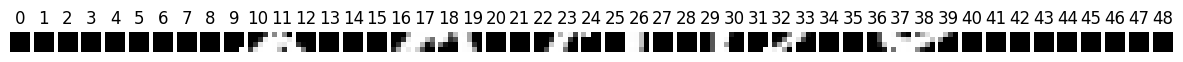

In [ ]:
patch_sequence = []
for i in range(0, image_size, patch_size):
    for j in range(0, image_size, patch_size):
        patch = first_image[i:i+patch_size, j:j+patch_size]
        patch_sequence.append(patch)
num_patches = (image_size // patch_size) ** 2
fig, axs = plt.subplots(1, num_patches, figsize=(15, 2))
for i, patch in enumerate(patch_sequence):
    axs[i].imshow(patch, cmap='gray')
    axs[i].set_title(i)
    axs[i].axis('off')

plt.show()

_Note: in most practical applications we will be dealing with much larger images, so we will need larger patches in order to sufficiently shorten the sequence length._


Finally we transform each patch, a 4x4 matrix, into a vector of 16 elements, which is the input our transformer expects. We simply flatten each patch:

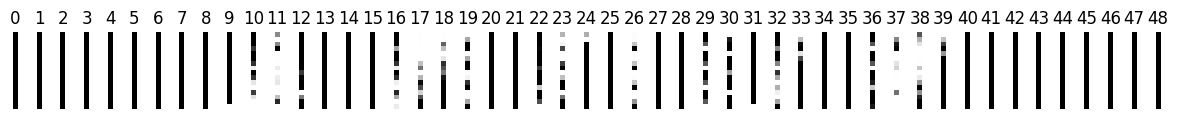

In [ ]:
fig, axs = plt.subplots(1, num_patches, figsize=(15, 1))
for i, patch in enumerate(patch_sequence):
    axs[i].imshow(patch.reshape(-1, 1), cmap='gray')
    axs[i].set_title(i)
    axs[i].axis('off')
plt.show()

We have our inputs ready. Now onto the model. This is the architecture our digit classifier will use:
    
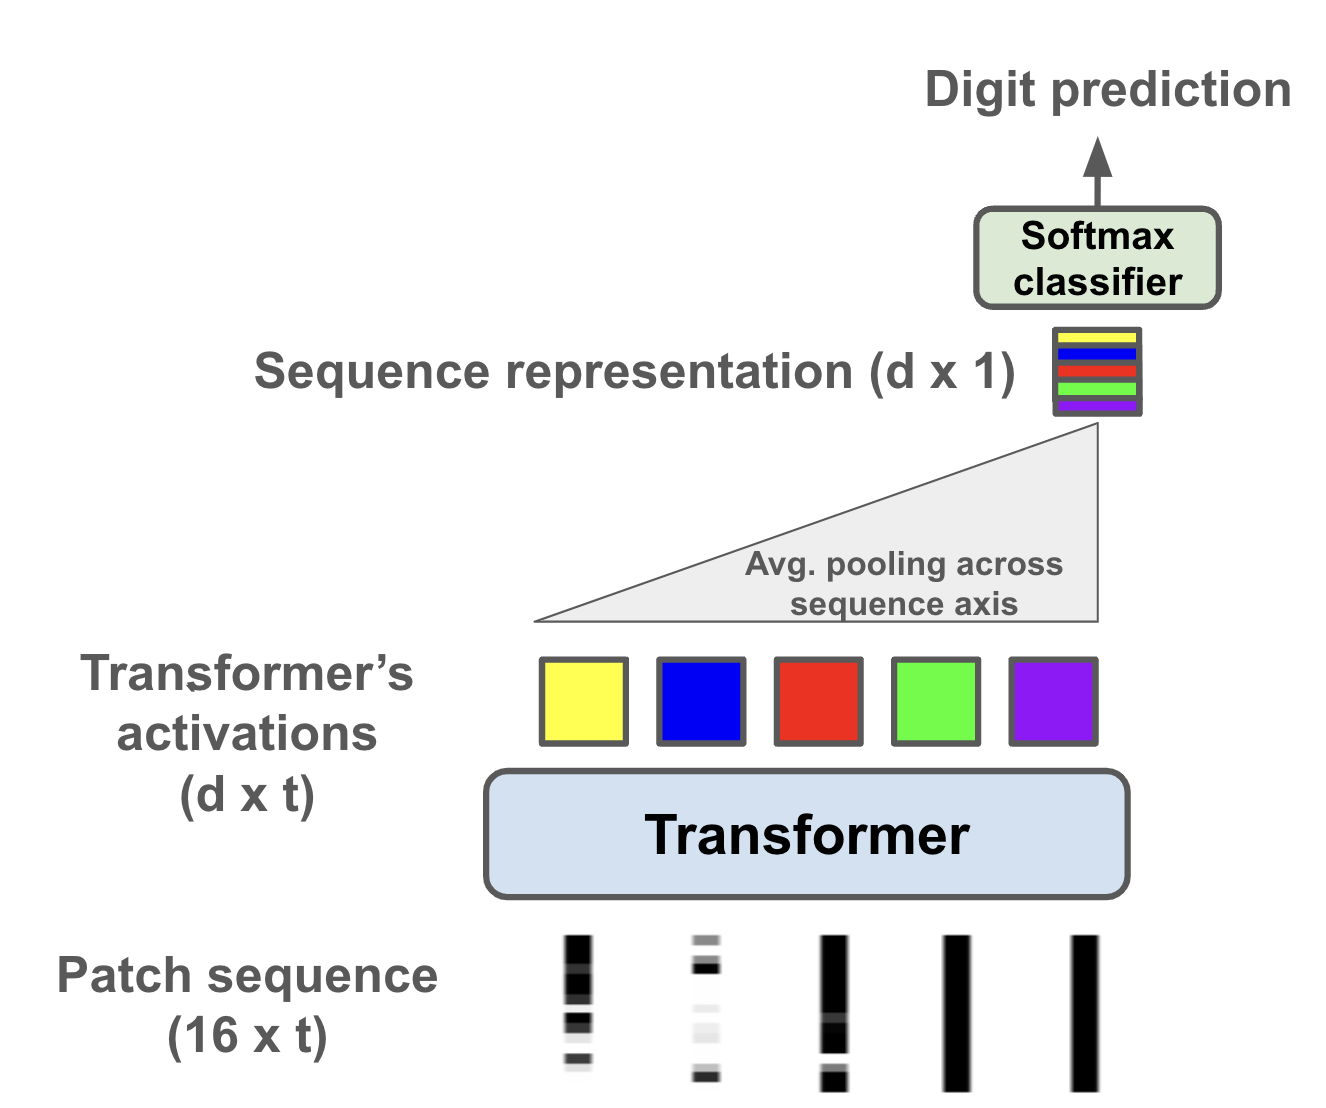

**Tasks**:
1. **(3 pt)** Implement the architecture of the classifier in the class `VisionTransformer` and train it on the MNIST dataset. Note that you can reuse most of the elements that you already implemented for `GPT`. You just need to avoid auto-regressive masking and figure out how to input the patches instead of discrete tokens.

__What I expect for this task__:

* Just the implementation either following the diagram (note that we use some specific operations, like average pooling), or if you deviate it from it, explain your choices.

2. **(2 pt)** Implement a simple convolutional network classifier and compare its performance with the vision transformer.

__What I expect for this task__:
* Ideally, as with every comparison, you'd do a few runs and compare the results statistically. If time does not allow it, you should anyway be able to see differences from single runs. Provide your intuitions on the reasons behind the differences you observe.

3. **(4 pt máx)** Implement any of the two methods from the paper [Vision Transformer for Small-Size Datasets](https://arxiv.org/pdf/2112.13492v1.pdf) to try to improve the performance of our model. You can find a Keras tutorial implementing them [here](https://keras.io/examples/vision/vit_small_ds/#implement-locality-self-attention). Each method is worth **2 pt**. **NOTE: the Keras tutorial is meant as guidance, you would need to port it to our framework, PyTorch.**

__What I expect for this task__:
* Implementation and comparison of results. Your explanations on why each method you implement is expected to improve performance.

Let's start defining some parameters. As before, it works with these defaults, but you can play with them

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

device = "cuda" if CUDA else "cpu"
# data
batch_size = 32
patch_size = 4
img_w, img_h = np.array(mnist_trainset[1][0]).shape
block_size = img_w // patch_size * img_h // patch_size
# model
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2
input_size = patch_size * patch_size
n_classes = 10 # 10-digit classification
# adamw optimizer
learning_rate = 5e-4 # max learning rate
max_iters = 10000 # total number of training iterations
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
warmup_iters = 1000 # how many steps to warm up for
lr_decay_iters = max_iters
min_lr = 5e-5
# logging
eval_interval = 1000
log_interval = 100

Now we preprocess our dataset to transform every image into patch sequences of shape `(49, patch_size, patch_size)`

In [ ]:
# Transformation to extract patches and flatten them
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)),
    transforms.Lambda(lambda x: x.contiguous().view(-1, patch_size, patch_size)),
])

# Apply the transform to the loaded datasets
mnist_trainset.transform = transform
mnist_testset.transform = transform

Here you have to define the model:

In [ ]:

class VisionTransformer(nn.Module):
    def __init__(self, input_size, n_classes, n_layer, n_embd, n_head, block_size, dropout):
        super().__init__()

        """# TODO TASK 1 #"""
        self.block_size = block_size

        self.block_size = block_size

        # Define the transformer components
        self.transformer = nn.ModuleDict(dict(
            wte=nn.Linear(input_size, n_embd),  # Linear layer for patch embedding
            wpe=nn.Embedding(block_size, n_embd),  # Positional embedding layer
            drop=nn.Dropout(dropout), # Dropout layer
            h=nn.ModuleList([Block(n_embd, n_head, block_size, dropout) for _ in range(n_layer)]),  # Transformer blocks
            ln_f=nn.LayerNorm(n_embd),  # Layer normalization
        ))

        # Classifier head
        self.classifier = nn.Linear(n_embd, n_classes)
        # init weights
        self.apply(self._init_weights)

    def _init_weights(self, module):
        # Initialize weights
        if isinstance(module, nn.Linear) or isinstance(module, nn.LayerNorm):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, x, targets=None):
        device = x.device
        b, t = x.size(0), x.size(1)
        assert t <= self.block_size, f"Cannot forward sequence of length {t}, block size is only {self.block_size}"

        """# TODO TASK 1 #"""
        # Compute patch embeddings and add positional encodings
        x = self.transformer.wte(x)  # Patch embeddings
        pos = torch.arange(t, device=device)  # Position indices
        x = x + self.transformer.wpe(pos)[None, :, :]  # Add positional embeddings
        x = self.transformer.drop(x)  # Apply dropout

        # Pass through each transformer block
        for block in self.transformer.h:
            x = block(x)

        # Apply final layer normalization
        x = self.transformer.ln_f(x)

        # Classifier head
        # Mean pooling is used before the classification layer
        logits = self.classifier(x.mean(dim=1))  # Using mean pooling here

        # Compute loss if targets are provided
        loss = F.cross_entropy(logits, targets) if targets is not None else None
        return logits, loss


## Explanation
The VisionTransformer class implements a vision-based transformer model, designed for image classification tasks. It divides an input image into patches, computes embeddings for each patch using a linear layer (wte), and incorporates positional information via positional embeddings (wpe). These embeddings are processed through a series of transformer blocks (h), which include multi-head self-attention and feed-forward layers, enabling the model to capture global relationships among image patches. A dropout layer is applied for regularization, and layer normalization (ln_f) ensures stable training. After passing through the transformer blocks, the embeddings are averaged (mean pooling) to produce a single representation for the input, which is passed to a classifier head for final predictions over the given number of classes. The model also supports loss computation when training labels are provided, using cross-entropy as the loss function. The weight initialization ensures stable model performance from the start. This architecture leverages the transformer’s ability to model long-range dependencies, making it highly effective for image-based tasks.

In [ ]:
# Create data loaders
train_loader = DataLoader(dataset=mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=mnist_testset, batch_size=batch_size, shuffle=False)

# Model
model = VisionTransformer(input_size, n_classes, n_layer, n_embd, n_head, block_size, dropout)
model.to(device)
# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

iter_counter = 0
vit_losses = []  # List to store test losses for Vision Transformer
vit_accuracy = [] # List to store accuracy metrics

while iter_counter < max_iters:
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Flatten the patch
        patch_sequence = data.view(-1, block_size, patch_size * patch_size).to(device)
        target = target.to(device)
        # Forward pass
        logits, loss = model(patch_sequence, target)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Calculate accuracy
        _, predicted = torch.max(logits, -1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        total_loss += loss.item()
        iter_counter += 1
        # Log loss and accuracy
        if iter_counter % log_interval == 0:
            avg_loss = total_loss / log_interval
            accuracy = correct / total
            print(f'Iter [{iter_counter}/{max_iters}], Batch [{batch_idx+1}/{len(train_loader)}], '
                  f'Loss: {avg_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')
            total_loss = 0.0
            correct = 0
            total = 0
        # Evaluate test loss
        if iter_counter % eval_interval == 0 or iter_counter == max_iters:
            model.eval()
            test_loss = 0.0
            test_correct = 0
            test_total = 0
            with torch.no_grad():
                for test_data, test_target in test_loader:
                    test_patch_sequence = test_data.view(-1, block_size, patch_size * patch_size).to(device)
                    test_target = test_target.to(device)
                    test_outputs, loss = model(test_patch_sequence, test_target)
                    test_loss += loss.item()
                    vit_losses.append(loss.item())
                    _, test_predicted = torch.max(test_outputs, -1)
                    test_total += test_target.size(0)
                    test_correct += (test_predicted == test_target).sum().item()

            avg_test_loss = test_loss / len(test_loader)
            test_accuracy = test_correct / test_total
            vit_accuracy.append(test_accuracy)

            print(f'Iter [{iter_counter}/{max_iters}], Batch [{batch_idx+1}/{len(train_loader)}], '
                  f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')
            model.train()
        if iter_counter == max_iters:
            break

Iter [100/10000], Batch [100/1875], Loss: 2.1972, Accuracy: 22.09%
Iter [200/10000], Batch [200/1875], Loss: 1.8524, Accuracy: 31.56%
Iter [300/10000], Batch [300/1875], Loss: 1.6173, Accuracy: 39.94%
Iter [400/10000], Batch [400/1875], Loss: 1.5927, Accuracy: 37.91%
Iter [500/10000], Batch [500/1875], Loss: 1.4980, Accuracy: 42.50%
Iter [600/10000], Batch [600/1875], Loss: 1.4597, Accuracy: 44.00%
Iter [700/10000], Batch [700/1875], Loss: 1.4199, Accuracy: 45.16%
Iter [800/10000], Batch [800/1875], Loss: 1.3484, Accuracy: 48.91%
Iter [900/10000], Batch [900/1875], Loss: 1.2637, Accuracy: 53.31%
Iter [1000/10000], Batch [1000/1875], Loss: 1.1928, Accuracy: 56.97%
Iter [1000/10000], Batch [1000/1875], Test Loss: 1.0672, Test Accuracy: 60.97%
Iter [1100/10000], Batch [1100/1875], Loss: 1.1132, Accuracy: 59.44%
Iter [1200/10000], Batch [1200/1875], Loss: 1.0185, Accuracy: 63.12%
Iter [1300/10000], Batch [1300/1875], Loss: 0.9374, Accuracy: 65.62%
Iter [1400/10000], Batch [1400/1875], Loss

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(dataset=mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=mnist_testset, batch_size=batch_size, shuffle=False)


In [ ]:
class SimpleCNN(torch.nn.Module):
    def __init__(self, n_classes):
        """
        Initializes the SimpleCNN model.

        Args:
            n_classes (int): The number of classes for the classification task.
        """
        super().__init__()
        # Convolutional layers
        self.conv_layers = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), # 32 filters, 3x3 kernel, stride 1, padding 1
            nn.ReLU(),  # Activation function
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer with 2x2 kernel, stride 2

            # Second convolutional layer
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # 64 filters, 3x3 kernel, stride 1, padding 1
            nn.ReLU(),  # Activation function
            nn.MaxPool2d(kernel_size=2, stride=2) # Max pooling layer with 2x2 kernel, stride 2
        )

        # Fully connected (dense) layers
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 7 * 7, 1024),  # Linear layer with 1024 output features
            nn.ReLU(),  # Activation function
            nn.Dropout(0.5),  # Dropout layer with 50% probability
            nn.Linear(1024, n_classes)  # Final linear layer with output size equal to the number of classes
        )

    def forward(self, x):
        """
        Forward pass of the SimpleCNN.

        Args:
            x (torch.Tensor): Input tensor.

        Returns:
            torch.Tensor: Output tensor after applying log softmax.
        """
        x = self.conv_layers(x) # Apply convolutional layers
        x = x.view(x.size(0), -1)  # Flatten the output for the dense layers
        x = self.fc_layers(x) # Apply fully connected layers
        return F.log_softmax(x, dim=1)  # Apply log softmax to the output

In [ ]:
def train(model, device, train_loader, optimizer, max_iters, log_interval):
    model.train() # Set the model to training mode
    total_loss = 0  # Total loss for all batches
    correct = 0 # Total number of correct predictions
    total = 0 # Total number of processed samples
    iter_counter = 0  # Count the number of iterations

    while iter_counter < max_iters:
        for batch_idx, (data, target) in enumerate(train_loader):
            if iter_counter >= max_iters:
                break

            # Move data to the specified device (e.g., GPU)
            data, target = data.to(device), target.to(device)
            # Reset gradients
            optimizer.zero_grad()
            # Forward pass: compute the model output
            output = model(data)
            # Compute the loss
            loss = F.nll_loss(output, target)
            # Backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # Update model parameters
            optimizer.step()

            # Update training statistics
            total_loss += loss.item() * data.size(0)  # Multiply by batch size for accurate average
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += data.size(0)
            iter_counter += 1

            # Log training statistics
            if iter_counter % log_interval == 0:
                avg_loss = total_loss / total  # Average loss across all processed batches
                accuracy = 100. * correct / total # Calculate accuracy
                print(f'Iteration: {iter_counter}/{max_iters}, Loss: {avg_loss:.6f}, Accuracy: {accuracy:.2f}%')
                total_loss = 0
                correct = 0
                total = 0


def test(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0 # Total loss on the test set
    correct = 0 # Total number of correct predictions
    with torch.no_grad(): # Disable gradient calculation
        for data, target in test_loader:
            # Move data to the specified device (e.g., GPU)
            data, target = data.to(device), target.to(device)
            # Compute model output
            output = model(data)
            # Sum up the loss
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss
            # Calculate the number of correct predictions
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate average loss and accuracy
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

In [ ]:
total_samples = len(mnist_trainset)

num_batches_per_epoch = total_samples / batch_size
num_epochs = int(round(max_iters / num_batches_per_epoch))

# Instantiate models
cnn_model = SimpleCNN(n_classes).to(device)

# Optimizer Adam for CNN
optimizer_cnn = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)

# Define a transformation pipeline for the MNIST dataset
transform_cnn = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,)),  # Normalize images with MNIST mean and standard deviation
])

# Create MNIST dataset instances for training and testing with the defined transformation
mnist_trainset_cnn = datasets.MNIST(root='./data', train=True, download=True, transform=transform_cnn)
mnist_testset_cnn = datasets.MNIST(root='./data', train=False, download=True, transform=transform_cnn)

# Create DataLoader instances for training and testing
train_loader_cnn = DataLoader(mnist_trainset_cnn, batch_size=batch_size, shuffle=True)
test_loader_cnn = DataLoader(mnist_testset_cnn, batch_size=batch_size, shuffle=False)

# Train the CNN model
train(cnn_model, device, train_loader_cnn, optimizer_cnn, max_iters, log_interval=100)
# Test the CNN model
test(cnn_model, device, test_loader_cnn)

Iteration: 100/10000, Loss: 0.742488, Accuracy: 76.34%
Iteration: 200/10000, Loss: 0.213893, Accuracy: 93.03%
Iteration: 300/10000, Loss: 0.165215, Accuracy: 95.03%
Iteration: 400/10000, Loss: 0.136743, Accuracy: 95.50%
Iteration: 500/10000, Loss: 0.122911, Accuracy: 96.78%
Iteration: 600/10000, Loss: 0.118713, Accuracy: 96.31%
Iteration: 700/10000, Loss: 0.105377, Accuracy: 96.91%
Iteration: 800/10000, Loss: 0.100269, Accuracy: 97.09%
Iteration: 900/10000, Loss: 0.083475, Accuracy: 97.47%
Iteration: 1000/10000, Loss: 0.086999, Accuracy: 97.56%
Iteration: 1100/10000, Loss: 0.087124, Accuracy: 97.22%
Iteration: 1200/10000, Loss: 0.074409, Accuracy: 97.56%
Iteration: 1300/10000, Loss: 0.072797, Accuracy: 97.59%
Iteration: 1400/10000, Loss: 0.068672, Accuracy: 97.62%
Iteration: 1500/10000, Loss: 0.076409, Accuracy: 97.72%
Iteration: 1600/10000, Loss: 0.091098, Accuracy: 97.31%
Iteration: 1700/10000, Loss: 0.067816, Accuracy: 97.75%
Iteration: 1800/10000, Loss: 0.067146, Accuracy: 98.06%
I

In [ ]:
def evaluate_model(model, device, test_loader):
    """
    Evaluates the given model on the test dataset.

    This function supports different types of models, including Vision Transformer and
    traditional CNNs. It handles data preparation differently for Vision Transformers
    and computes the average loss and accuracy over the entire test dataset.

    Args:
        model (torch.nn.Module): The model to be evaluated. Can be a Vision Transformer, CNN, or any other PyTorch model.
        device (torch.device): The device on which to perform the evaluation (e.g., 'cuda', 'cpu').
        test_loader (torch.utils.data.DataLoader): The DataLoader providing the test dataset.

    Returns:
        list: A list of losses for each batch in the test dataset.
        float: The average loss over the entire test dataset.
        float: The accuracy percentage over the entire test dataset.
    """
    model.eval()  # Set the model to evaluation mode
    test_losses = []  # List to store the loss of each batch
    correct = 0 # Counter for the number of correct predictions
    with torch.no_grad(): # Disable gradient computation
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            # Handle Vision Transformer output
            if isinstance(model, VisionTransformer):
                # Flatten patches for Vision Transformer
                data = data.view(-1, block_size, patch_size * patch_size)  # Flatten patches for Vision Transformer
                # Forward pass through the model
                logits, _ = model(data, target)
                # Convert logits to probabilities
                outputs = F.log_softmax(logits, dim=1)
            else:
                # Handle CNN and other model outputs
                outputs = model(data)
                 # If the output is a tuple (logits, loss), extract the logits
                if isinstance(outputs, tuple):
                    outputs = outputs[0]  # Assuming the first element is the logits for models that return a tuple

            # Compute the loss
            loss = F.nll_loss(outputs, target, reduction='sum').item()
            test_losses.append(loss)  # Append loss to the list

            # Compute accuracy
            pred = outputs.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate the average loss and accuracy
    average_loss = sum(test_losses) / len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_losses, average_loss, accuracy


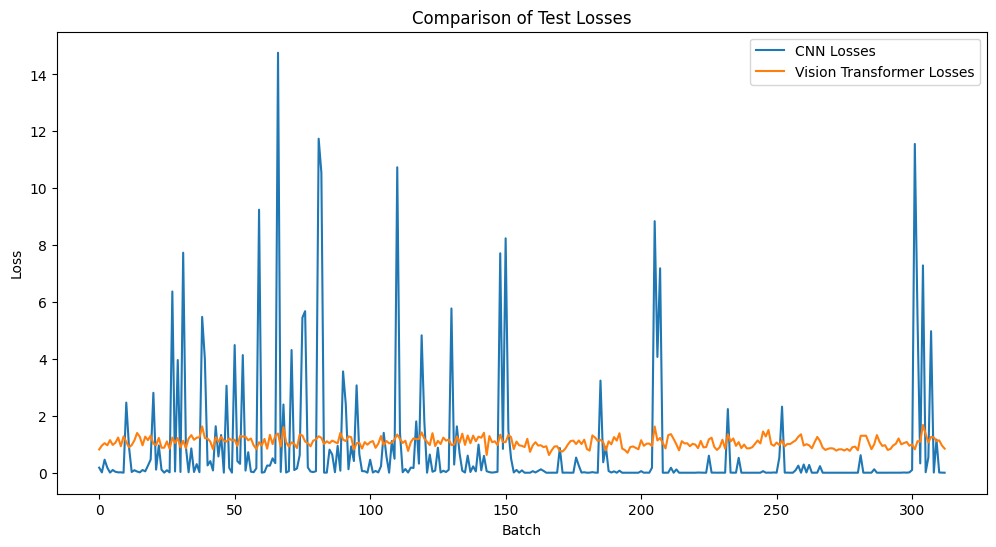

In [ ]:
# Evaluate the CNN
test_losses_cnn, avg_loss_cnn, accuracy_cnn = evaluate_model(cnn_model, device, test_loader_cnn)

plt.figure(figsize=(12, 6))
plt.plot(test_losses_cnn, label='CNN Losses')
plt.plot(vit_losses[:len(test_losses_cnn)], label='Vision Transformer Losses')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Comparison of Test Losses')
plt.legend()
plt.show()

## Explanation

This plot compares the test losses of two models: a Convolutional Neural Network (CNN) and a Vision Transformer (ViT). The blue line represents the CNN losses, which exhibit significant variability with frequent spikes, indicating instability during testing. This variability could stem from the CNN's reliance on local spatial features, which may lead to inconsistencies when handling diverse or complex test samples. In contrast, the orange line represents the Vision Transformer losses, which are much smoother and more stable across batches. This stability suggests that the Vision Transformer is better at capturing global dependencies and patterns in the data, leading to more consistent predictions.

The plot highlights the robustness of the Vision Transformer in handling test data compared to the CNN, which appears more sensitive to sample variability.

## Implimenatation of SPT and LSA from the paper

The given paper introduces two methods to enhance the locality inductive bias of Vision Transformers (ViTs), enabling them to perform better on small-sized datasets when trained from scratch. The first method, Shifted Patch Tokenization (SPT), improves the tokenization process by incorporating spatial relationships between neighboring pixels. Inspired by the Temporal Shift Module (TSM), SPT spatially shifts parts of the input image and tokenizes the original and shifted images together. This approach increases the receptive field of the ViT, embedding more spatial information into each visual token and thus enhancing the model's ability to capture local features.

The second method, Locality Self-Attention (LSA), modifies the self-attention mechanism to focus more on local information. By excluding self-tokens and introducing a learnable temperature to the softmax function, LSA reduces the smoothing of attention score distributions. This encourages each token to prioritize nearby tokens with strong relationships, effectively guiding the model to attend locally.

Both SPT and LSA can be seamlessly integrated into existing ViTs as add-on modules without altering their architecture. These methods lead to significant performance improvements across various datasets. For instance, experiments show an increase in classification accuracy by up to 29.6% on Tiny-ImageNet and up to 10.6% on larger datasets like ImageNet. Qualitative results also demonstrate that these techniques enable ViTs to capture object shapes more effectively, enhancing their understanding of spatial relationships. Overall, SPT and LSA significantly improve ViT performance with minimal computational overhead.

Shifted Patch Tokenization (SPT)

Iter [50/1000] Train Loss: 1.2867, Train Accuracy: 55.69%
Iter [100/1000] Train Loss: 0.5900, Train Accuracy: 80.38%
Iter [100/1000] Test Loss: 0.5393, Test Accuracy: 82.39%
Iter [150/1000] Train Loss: 0.4781, Train Accuracy: 85.62%
Iter [200/1000] Train Loss: 0.4421, Train Accuracy: 86.56%
Iter [200/1000] Test Loss: 0.4318, Test Accuracy: 86.05%
Iter [250/1000] Train Loss: 0.4214, Train Accuracy: 87.25%
Iter [300/1000] Train Loss: 0.3923, Train Accuracy: 87.88%
Iter [300/1000] Test Loss: 0.3896, Test Accuracy: 87.51%
Iter [350/1000] Train Loss: 0.4017, Train Accuracy: 88.25%
Iter [400/1000] Train Loss: 0.4025, Train Accuracy: 87.25%
Iter [400/1000] Test Loss: 0.3510, Test Accuracy: 89.07%
Iter [450/1000] Train Loss: 0.3944, Train Accuracy: 88.62%
Iter [500/1000] Train Loss: 0.3336, Train Accuracy: 90.06%
Iter [500/1000] Test Loss: 0.2947, Test Accuracy: 91.06%
Iter [550/1000] Train Loss: 0.2656, Train Accuracy: 92.19%
Iter [600/1000] Train Loss: 0.2998, Train Accuracy: 90.75%
Iter [60

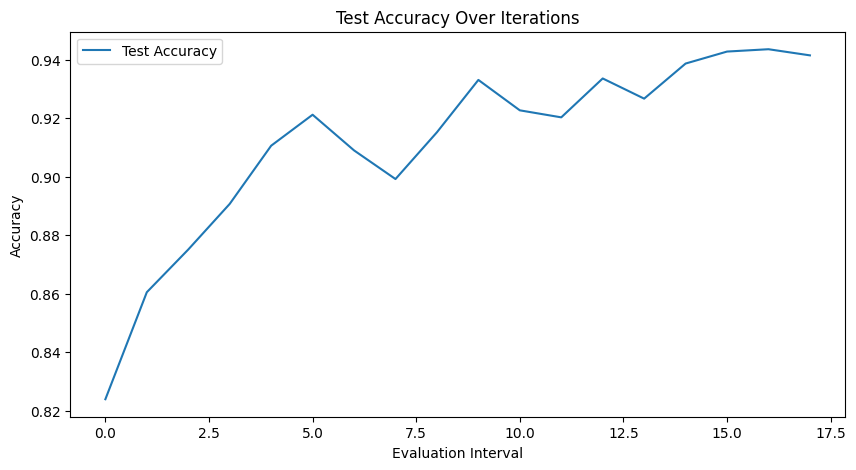

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

# Define Shifted Patch Dataset
class ShiftedPatchDataset(Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __len__(self):
        return len(self.mnist_dataset)

    def __getitem__(self, idx):
        image, label = self.mnist_dataset[idx]
        image = np.array(image)

        up = np.roll(image, -1, axis=0)
        down = np.roll(image, 1, axis=0)
        left = np.roll(image, -1, axis=1)
        right = np.roll(image, 1, axis=1)

        stacked_images = np.stack([image, up, down, left, right], axis=0)
        stacked_images = stacked_images.reshape(5, -1)  # Each patch is flattened
        return torch.tensor(stacked_images, dtype=torch.float32), label

# Define the Vision Transformer Block
class Block(nn.Module):
    def __init__(self, n_embd, n_head, dropout):
        super().__init__()
        self.ln_1 = nn.LayerNorm(n_embd)
        self.attn = nn.MultiheadAttention(n_embd, n_head, dropout=dropout, batch_first=True)
        self.ln_2 = nn.LayerNorm(n_embd)
        self.mlp = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.GELU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        x = x + self.attn(self.ln_1(x), self.ln_1(x), self.ln_1(x))[0]
        x = x + self.mlp(self.ln_2(x))
        return x

# Define the Vision Transformer Model
class VisionTransformer(nn.Module):
    def __init__(self, input_size, n_classes, n_layer, n_embd, n_head, dropout):
        super().__init__()
        self.embedding = nn.Linear(input_size, n_embd)
        self.positional_encoding = nn.Embedding(5, n_embd)  # Hardcoded for 5 patches
        self.transformer_blocks = nn.ModuleList([
            Block(n_embd, n_head, dropout) for _ in range(n_layer)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.classifier = nn.Linear(n_embd, n_classes)

    def forward(self, x, targets=None):
        b, t, _ = x.size()
        positions = torch.arange(t, device=x.device).unsqueeze(0).expand(b, t)

        x = self.embedding(x) + self.positional_encoding(positions)
        for block in self.transformer_blocks:
            x = block(x)
        x = self.ln_f(x)
        logits = self.classifier(x.mean(dim=1))

        loss = F.cross_entropy(logits, targets) if targets is not None else None
        return logits, loss

# Dataset Preparation
transform = transforms.Compose([
    transforms.ToTensor()
])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

shifted_trainset = ShiftedPatchDataset(mnist_trainset)
shifted_testset = ShiftedPatchDataset(mnist_testset)

batch_size = 32
train_loader = DataLoader(shifted_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(shifted_testset, batch_size=batch_size, shuffle=False)

# Model Configuration
patch_size = 28  # Adjusted to match MNIST's 28x28 size
input_size = patch_size * patch_size
n_classes = 10
n_layer = 6
n_embd = 384
n_head = 6
dropout = 0.2
learning_rate = 1e-4

# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VisionTransformer(input_size, n_classes, n_layer, n_embd, n_head, dropout).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training and Evaluation
max_iters = 1000
eval_interval = 100
log_interval = 50

iter_counter = 0
train_losses, test_losses, test_accuracies = [], [], []

while iter_counter < max_iters:
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        logits, loss = model(data, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = logits.argmax(dim=-1)
        correct += (predicted == target).sum().item()
        total += target.size(0)
        iter_counter += 1

        if iter_counter % log_interval == 0:
            avg_loss = total_loss / log_interval
            accuracy = correct / total
            print(f"Iter [{iter_counter}/{max_iters}] Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy * 100:.2f}%")
            train_losses.append(avg_loss)
            total_loss, correct, total = 0.0, 0, 0

        if iter_counter % eval_interval == 0 or iter_counter == max_iters:
            model.eval()
            test_loss, test_correct, test_total = 0.0, 0, 0

            with torch.no_grad():
                for test_data, test_target in test_loader:
                    test_data = test_data.to(device)
                    test_target = test_target.to(device)

                    test_logits, loss = model(test_data, test_target)
                    test_loss += loss.item()
                    test_predicted = test_logits.argmax(dim=-1)
                    test_correct += (test_predicted == test_target).sum().item()
                    test_total += test_target.size(0)

            avg_test_loss = test_loss / len(test_loader)
            test_accuracy = test_correct / test_total
            print(f"Iter [{iter_counter}/{max_iters}] Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")
            test_losses.append(avg_test_loss)
            test_accuracies.append(test_accuracy)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Test Accuracy Over Iterations')
plt.xlabel('Evaluation Interval')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Iter [50/1000] Train Loss: 1.3826, Train Accuracy: 54.06%
Iter [100/1000] Train Loss: 0.6916, Train Accuracy: 78.50%
Iter [100/1000] Test Loss: 0.5000, Test Accuracy: 85.55%
Iter [150/1000] Train Loss: 0.4854, Train Accuracy: 85.75%
Iter [200/1000] Train Loss: 0.4526, Train Accuracy: 85.44%
Iter [200/1000] Test Loss: 0.4035, Test Accuracy: 87.67%
Iter [250/1000] Train Loss: 0.4406, Train Accuracy: 86.81%
Iter [300/1000] Train Loss: 0.3973, Train Accuracy: 87.75%
Iter [300/1000] Test Loss: 0.3817, Test Accuracy: 88.85%
Iter [350/1000] Train Loss: 0.4245, Train Accuracy: 87.06%
Iter [400/1000] Train Loss: 0.3368, Train Accuracy: 89.94%
Iter [400/1000] Test Loss: 0.3623, Test Accuracy: 88.89%
Iter [450/1000] Train Loss: 0.3554, Train Accuracy: 89.00%
Iter [500/1000] Train Loss: 0.3619, Train Accuracy: 89.12%
Iter [500/1000] Test Loss: 0.2909, Test Accuracy: 91.47%
Iter [550/1000] Train Loss: 0.3311, Train Accuracy: 90.44%
Iter [600/1000] Train Loss: 0.3251, Train Accuracy: 90.06%
Iter [60

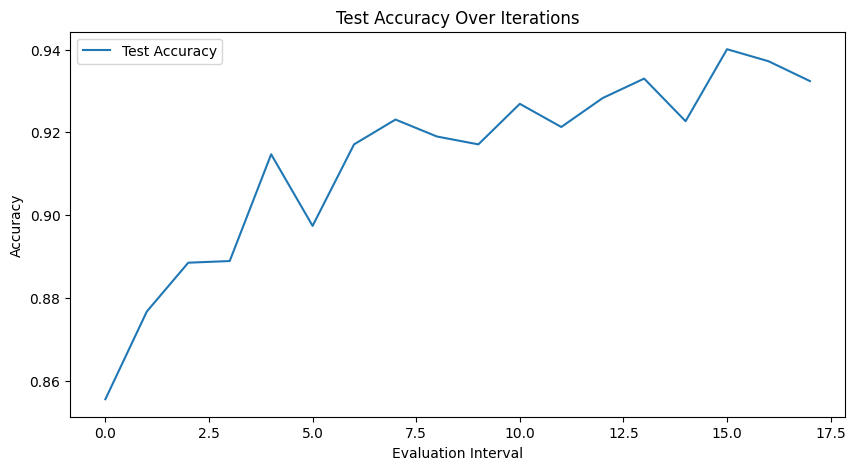

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

# Define Shifted Patch Dataset
class ShiftedPatchDataset(Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __len__(self):
        return len(self.mnist_dataset)

    def __getitem__(self, idx):
        image, label = self.mnist_dataset[idx]
        image = np.array(image)

        up = np.roll(image, -1, axis=0)
        down = np.roll(image, 1, axis=0)
        left = np.roll(image, -1, axis=1)
        right = np.roll(image, 1, axis=1)

        stacked_images = np.stack([image, up, down, left, right], axis=0)
        stacked_images = stacked_images.reshape(5, -1)  # Each patch is flattened
        return torch.tensor(stacked_images, dtype=torch.float32), label

# Define Locality Self-Attention (LSA)
class LocalitySelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.0):
        super().__init__()
        self.num_heads = num_heads
        self.scale = nn.Parameter(torch.sqrt(torch.tensor(embed_dim // num_heads, dtype=torch.float32)))
        self.qkv = nn.Linear(embed_dim, embed_dim * 3, bias=False)
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        b, t, d = x.size()
        qkv = self.qkv(x).reshape(b, t, 3, self.num_heads, d // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) / self.scale
        attn = attn.masked_fill(torch.eye(t, device=x.device).bool(), float('-inf'))  # Mask diagonal
        attn = F.softmax(attn, dim=-1)
        attn = self.dropout(attn)

        out = (attn @ v).transpose(1, 2).reshape(b, t, d)
        return self.proj(out)

# Define the Vision Transformer Block with LSA
class Block(nn.Module):
    def __init__(self, n_embd, n_head, dropout):
        super().__init__()
        self.ln_1 = nn.LayerNorm(n_embd)
        self.attn = LocalitySelfAttention(n_embd, n_head, dropout=dropout)
        self.ln_2 = nn.LayerNorm(n_embd)
        self.mlp = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.GELU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x

# Define the Vision Transformer Model
class VisionTransformer(nn.Module):
    def __init__(self, input_size, n_classes, n_layer, n_embd, n_head, dropout):
        super().__init__()
        self.embedding = nn.Linear(input_size, n_embd)
        self.positional_encoding = nn.Embedding(5, n_embd)  # Hardcoded for 5 patches
        self.transformer_blocks = nn.ModuleList([
            Block(n_embd, n_head, dropout) for _ in range(n_layer)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.classifier = nn.Linear(n_embd, n_classes)

    def forward(self, x, targets=None):
        b, t, _ = x.size()
        positions = torch.arange(t, device=x.device).unsqueeze(0).expand(b, t)

        x = self.embedding(x) + self.positional_encoding(positions)
        for block in self.transformer_blocks:
            x = block(x)
        x = self.ln_f(x)
        logits = self.classifier(x.mean(dim=1))

        loss = F.cross_entropy(logits, targets) if targets is not None else None
        return logits, loss

# Dataset Preparation
transform = transforms.Compose([
    transforms.ToTensor()
])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

shifted_trainset = ShiftedPatchDataset(mnist_trainset)
shifted_testset = ShiftedPatchDataset(mnist_testset)

batch_size = 32
train_loader = DataLoader(shifted_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(shifted_testset, batch_size=batch_size, shuffle=False)

# Model Configuration
patch_size = 28  # Adjusted to match MNIST's 28x28 size
input_size = patch_size * patch_size
n_classes = 10
n_layer = 6
n_embd = 384
n_head = 6
dropout = 0.2
learning_rate = 1e-4

# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VisionTransformer(input_size, n_classes, n_layer, n_embd, n_head, dropout).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training and Evaluation
max_iters = 1000
eval_interval = 100
log_interval = 50

iter_counter = 0
train_losses, test_losses, test_accuracies = [], [], []

while iter_counter < max_iters:
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        logits, loss = model(data, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = logits.argmax(dim=-1)
        correct += (predicted == target).sum().item()
        total += target.size(0)
        iter_counter += 1

        if iter_counter % log_interval == 0:
            avg_loss = total_loss / log_interval
            accuracy = correct / total
            print(f"Iter [{iter_counter}/{max_iters}] Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy * 100:.2f}%")
            train_losses.append(avg_loss)
            total_loss, correct, total = 0.0, 0, 0

        if iter_counter % eval_interval == 0 or iter_counter == max_iters:
            model.eval()
            test_loss, test_correct, test_total = 0.0, 0, 0

            with torch.no_grad():
                for test_data, test_target in test_loader:
                    test_data = test_data.to(device)
                    test_target = test_target.to(device)

                    test_logits, loss = model(test_data, test_target)
                    test_loss += loss.item()
                    test_predicted = test_logits.argmax(dim=-1)
                    test_correct += (test_predicted == test_target).sum().item()
                    test_total += test_target.size(0)

            avg_test_loss = test_loss / len(test_loader)
            test_accuracy = test_correct / test_total
            print(f"Iter [{iter_counter}/{max_iters}] Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")
            test_losses.append(avg_test_loss)
            test_accuracies.append(test_accuracy)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Test Accuracy Over Iterations')
plt.xlabel('Evaluation Interval')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Explanation

The two plots illustrate the progression of test accuracy over training iterations for a Vision Transformer for both SPT and LSA. In both cases, the accuracy begins around 85-86% and steadily improves, eventually reaching approximately 94%. This upward trend highlights the model's ability to learn and adapt effectively to the task. The Shifted Patch Tokenization (SPT) exhibits a smoother improvement, while the Locally Self Attenation (LSA) model plot shows slightly more variability in intermediate evaluations, possibly due to differences in training configurations, random initialization, or hyperparameter tuning.